**1. EDA**

**Целевые переменные:**

**IC50, mM (Inhibitory Concentration 50%)** - концентрация вещества, при которой наблюдается подавление активности фермента на 50%. mM —единица измерения концентрации (миллимоль на литр, 1 mM = 0.001 моль/л). Таким образом, IC50, mM - концентрации вещества в миллимолях на литр, при которой эффект ингибирования достигает 50%. Чем больше IC50, тем более сильный ингибитор.


**CC50, mM (Cytotoxic Concentration 50%)** – концентрация вещества (ммоль на литр, mM), при которой наблюдается гибель 50% клеток в исследуемой популяции. Чем выше значение, тем меньше токсичность соединения.


**SI (Selectivity Index)** – оценка избирательности действия вещества между двумя объектами. Высчитывается из предыдущих показателей, отношение токсичности к эффективности: **SI = CC50 / IC50**. Чем выше значение SI, тем соединение более селективно.


In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [ ]:
# Загрузка данных
dataset = pd.read_excel("Данные_для_курсовой.xlsx")

In [ ]:
dataset.head()

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 214 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
# Количество NaN
NaNs_count = dataset.isna().sum().sum()
print(f"NaN: {NaNs_count}")

NaN: 36


Датасет содержит 1000 строк и 213 коолонок, так что объём данных небольшой.

Обнаружено 36 значений NaN. Также видим столбец Unnamed, он неинформативен.

Удалим столбец Unnamed и заменим все значения NaN на 0.

In [ ]:
# Удаляем столбцы Unnamed
dataset.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Заменяем все NaN на 0
dataset.fillna(0, inplace=True)

In [ ]:
dataset.head()

IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0           0             0           0                  0             0   
1           0             0           0                  0             0   
2           0             0           0                  0             0   
3           0             0           0                  0             0   
4           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 213 columns]

Так как датасет небольшой, выбросы будем искать только в целевых переменных, чтобы максимально сохранить объём данных для адекватного обучения моделей. В результате сформируем отдельные датасеты для каждой переменной.

In [ ]:
# Датасет для IC50
dataset_for_IC50 = dataset.drop(['CC50, mM', 'SI'], axis=1)
dataset_for_IC50.head()

IC50, mM  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0    6.239374           5.094096        5.094096           0.387225   
1    0.771831           3.961417        3.961417           0.533868   
2  223.808778           2.627117        2.627117           0.543231   
3    1.705624           5.097360        5.097360           0.390603   
4  107.131532           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

In [ ]:
# Создадим функцию для визуализации одного столбца в датасете c помощью нескольких графиков.

def visualize_column(dataset, column_name):
	sns.set(style="whitegrid", font_scale=0.5)
	indices = dataset.index
	step = max(1, len(indices) // 60)

	# Комплексная визуализация
	sns.set(style="whitegrid")
	plt.figure(figsize=(25, 10))

	plt.subplot(1, 5, 1)
	sns.boxplot(y=dataset[column_name], color='skyblue')
	plt.title('Boxplot')
	plt.ylabel('Значения')


	plt.title(f"Точечное распределение {column_name}")
	plt.ylabel(f"{column_name}")
	plt.xlabel("Наблюдения")

	plt.subplot(1, 5, 4)
	sns.set(style="whitegrid", font_scale=1.1)
	scatter = sns.scatterplot(
		data=dataset,
		x=indices,
		y=column_name,
		hue=column_name,
		palette="viridis",
		size=column_name,
		sizes=(20, 200),
		alpha=0.7,
		edgecolor='black'
	)


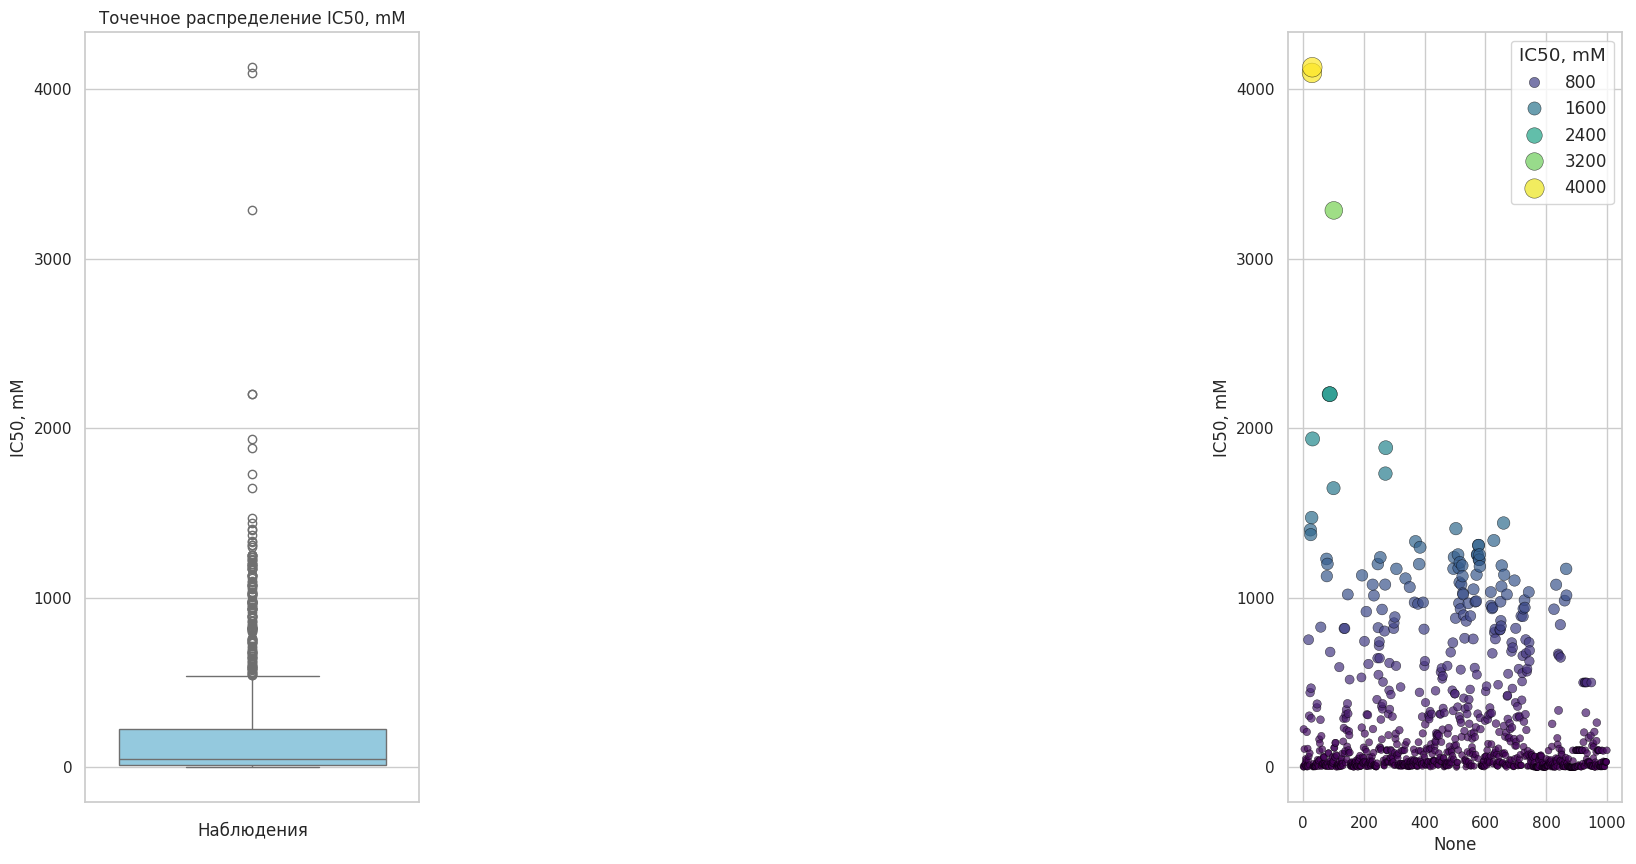

In [ ]:
visualize_column(dataset_for_IC50, 'IC50, mM')

Как видим, распределение значений для переменной IC50 ненормальное.

Посмотрим для остальных.

In [ ]:
# Датасет для CC50
dataset_for_CC50 = dataset.drop(['IC50, mM', 'SI'], axis=1)
dataset_for_CC50.head()

CC50, mM  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0  175.482382           5.094096        5.094096           0.387225   
1    5.402819           3.961417        3.961417           0.533868   
2  161.142320           2.627117        2.627117           0.543231   
3  107.855654           5.097360        5.097360           0.390603   
4  139.270991           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

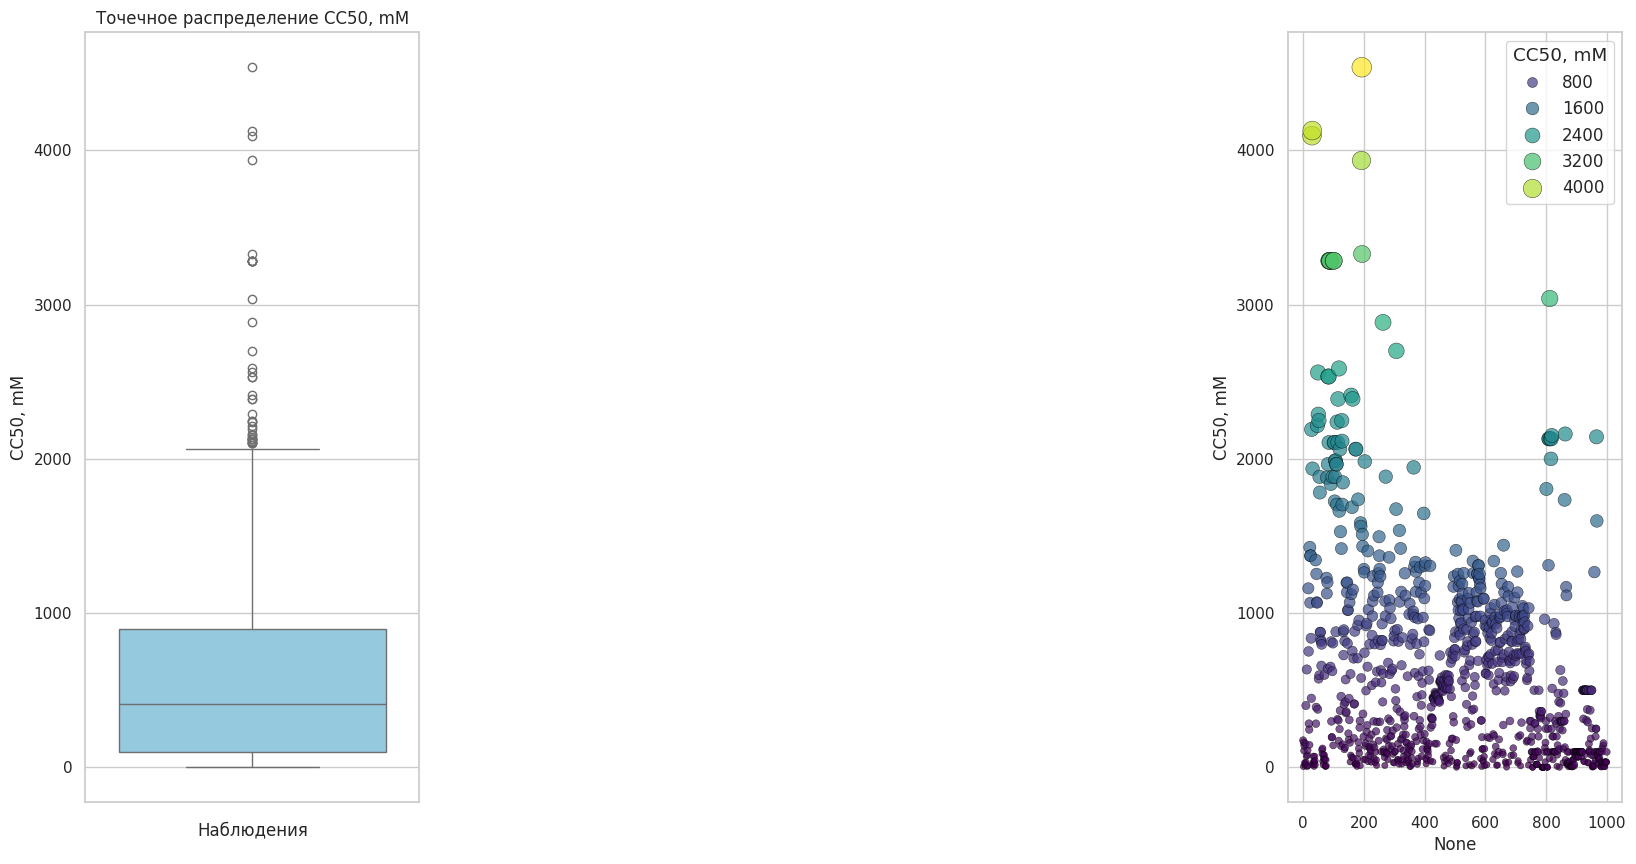

In [ ]:
visualize_column(dataset_for_CC50, 'CC50, mM')

Здесь тоже наблюдаем ненормальное распределение.
Осталось посмотретьь переменную SI.

In [ ]:
# Датасет для SI
dataset_for_SI = dataset.drop(['IC50, mM', 'CC50, mM'], axis=1)
dataset_for_SI.head()

SI  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0  28.125000           5.094096        5.094096           0.387225   
1   7.000000           3.961417        3.961417           0.533868   
2   0.720000           2.627117        2.627117           0.543231   
3  63.235294           5.097360        5.097360           0.390603   
4   1.300000           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

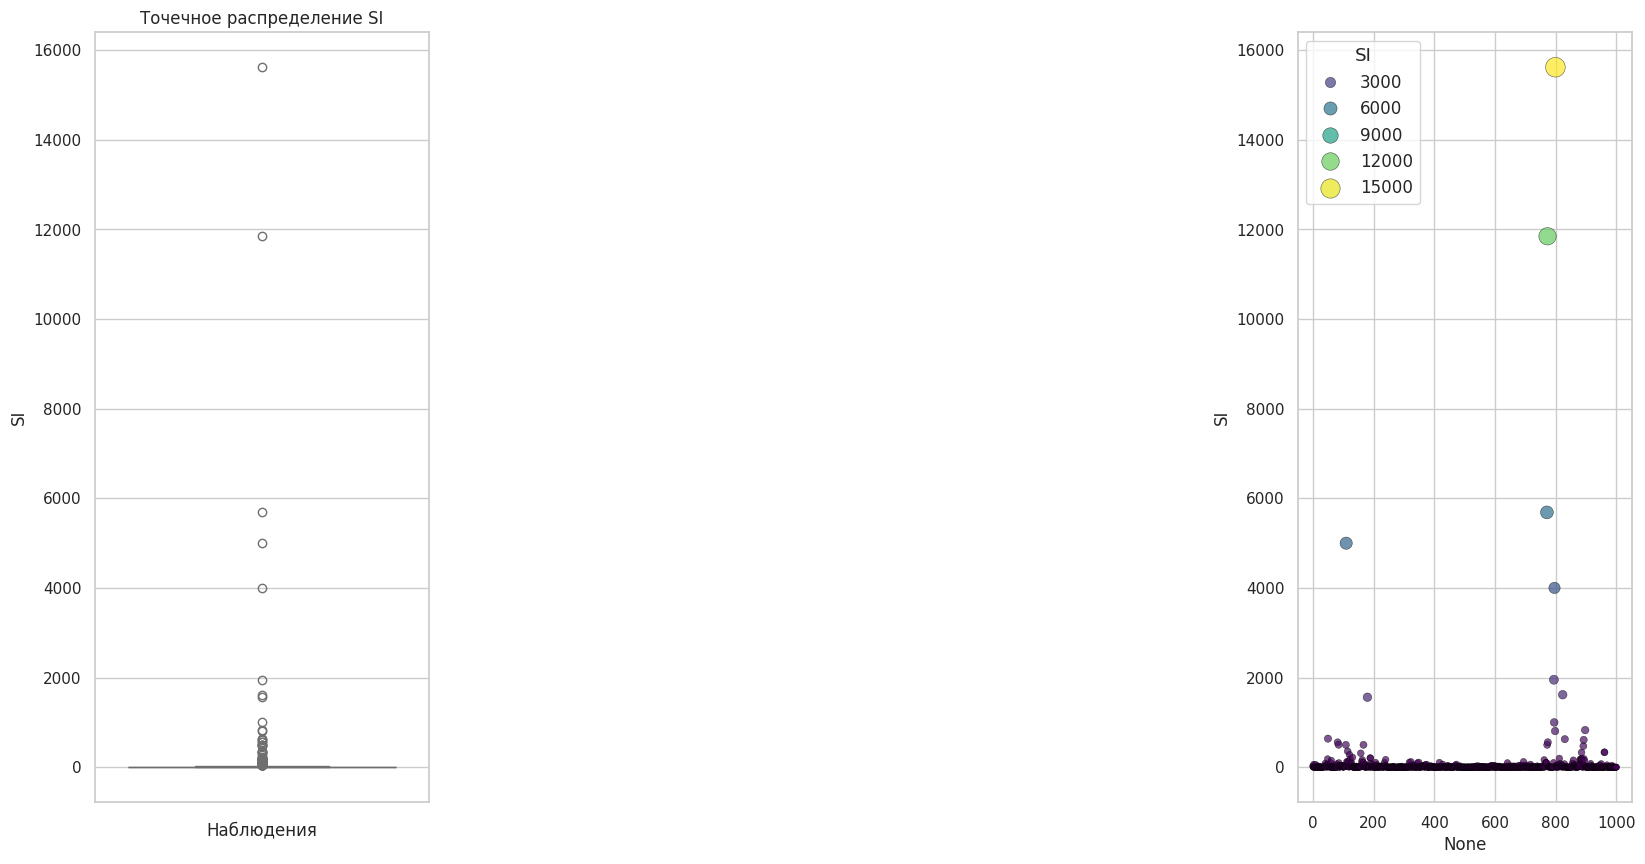

In [ ]:
visualize_column(dataset_for_SI, 'SI')

Снова видим ненормальное распределение.

Будем создавать новые датасеты по каждой переменной без выбросов.

In [ ]:
def remove_all_outliers(df, column):

    df_clean = df.copy()
    total_removed = 0

    while True:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        # Найти выбросы сверху
        outliers = df_clean[df_clean[column] > upper_bound]
        num_outliers = outliers.shape[0]

        print(f"Верхняя граница: {upper_bound:.3f}, выбросов сверху: {num_outliers}")

        if num_outliers == 0:
            break

        # Удалить выбросы сверху
        df_clean = df_clean[df_clean[column] <= upper_bound]
        total_removed += num_outliers

    print(f"Удалено строк: {total_removed}")
    return df_clean

In [ ]:
dataset_for_IC50 = remove_all_outliers(dataset_for_IC50, 'IC50, mM')
dataset_for_IC50.info()

Верхняя граница: 543.667, выбросов сверху: 147
Верхняя граница: 235.294, выбросов сверху: 98
Верхняя граница: 165.002, выбросов сверху: 48
Верхняя граница: 132.849, выбросов сверху: 22
Верхняя граница: 120.631, выбросов сверху: 11
Верхняя граница: 111.225, выбросов сверху: 10
Верхняя граница: 102.701, выбросов сверху: 9
Верхняя граница: 98.601, выбросов сверху: 34
Верхняя граница: 87.034, выбросов сверху: 21
Верхняя граница: 79.043, выбросов сверху: 20
Верхняя граница: 72.802, выбросов сверху: 10
Верхняя граница: 70.812, выбросов сверху: 4
Верхняя граница: 70.727, выбросов сверху: 0
Удалено строк: 434
<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 999
Columns: 211 entries, IC50, mM to fr_urea
dtypes: float64(105), int64(106)
memory usage: 939.1 KB


In [ ]:
dataset_for_CC50 = remove_all_outliers(dataset_for_CC50, 'CC50, mM')
dataset_for_CC50.info()

Верхняя граница: 2085.224, выбросов сверху: 39
Верхняя граница: 1940.708, выбросов сверху: 11
Верхняя граница: 1906.833, выбросов сверху: 1
Верхняя граница: 1903.485, выбросов сверху: 0
Удалено строк: 51
<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 1000
Columns: 211 entries, CC50, mM to fr_urea
dtypes: float64(105), int64(106)
memory usage: 1.5 MB


In [ ]:
dataset_for_SI = remove_all_outliers(dataset_for_SI, 'SI')
dataset_for_SI.info()

Верхняя граница: 39.267, выбросов сверху: 125
Верхняя граница: 20.347, выбросов сверху: 97
Верхняя граница: 13.568, выбросов сверху: 58
Верхняя граница: 10.423, выбросов сверху: 40
Верхняя граница: 8.622, выбросов сверху: 29
Верхняя граница: 7.509, выбросов сверху: 19
Верхняя граница: 7.181, выбросов сверху: 12
Верхняя граница: 6.751, выбросов сверху: 10
Верхняя граница: 6.462, выбросов сверху: 17
Верхняя граница: 6.239, выбросов сверху: 3
Верхняя граница: 6.196, выбросов сверху: 2
Верхняя граница: 6.153, выбросов сверху: 1
Верхняя граница: 6.138, выбросов сверху: 0
Удалено строк: 413
<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 2 to 1000
Columns: 211 entries, SI to fr_urea
dtypes: float64(105), int64(106)
memory usage: 973.9 KB


Посмотрим, что получается.

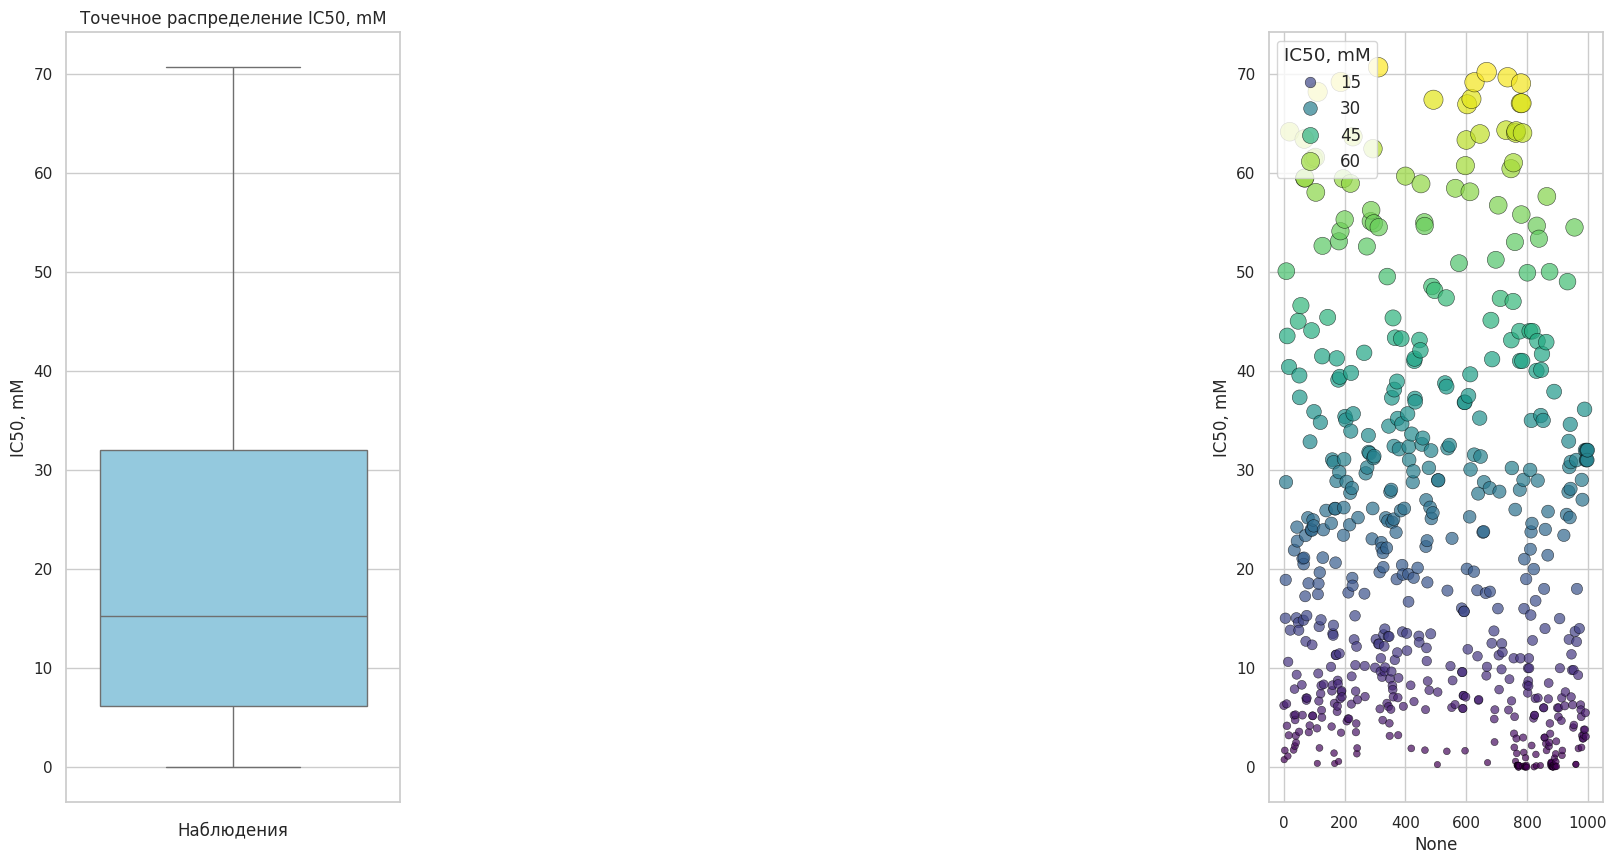

In [ ]:
visualize_column(dataset_for_IC50, 'IC50, mM')

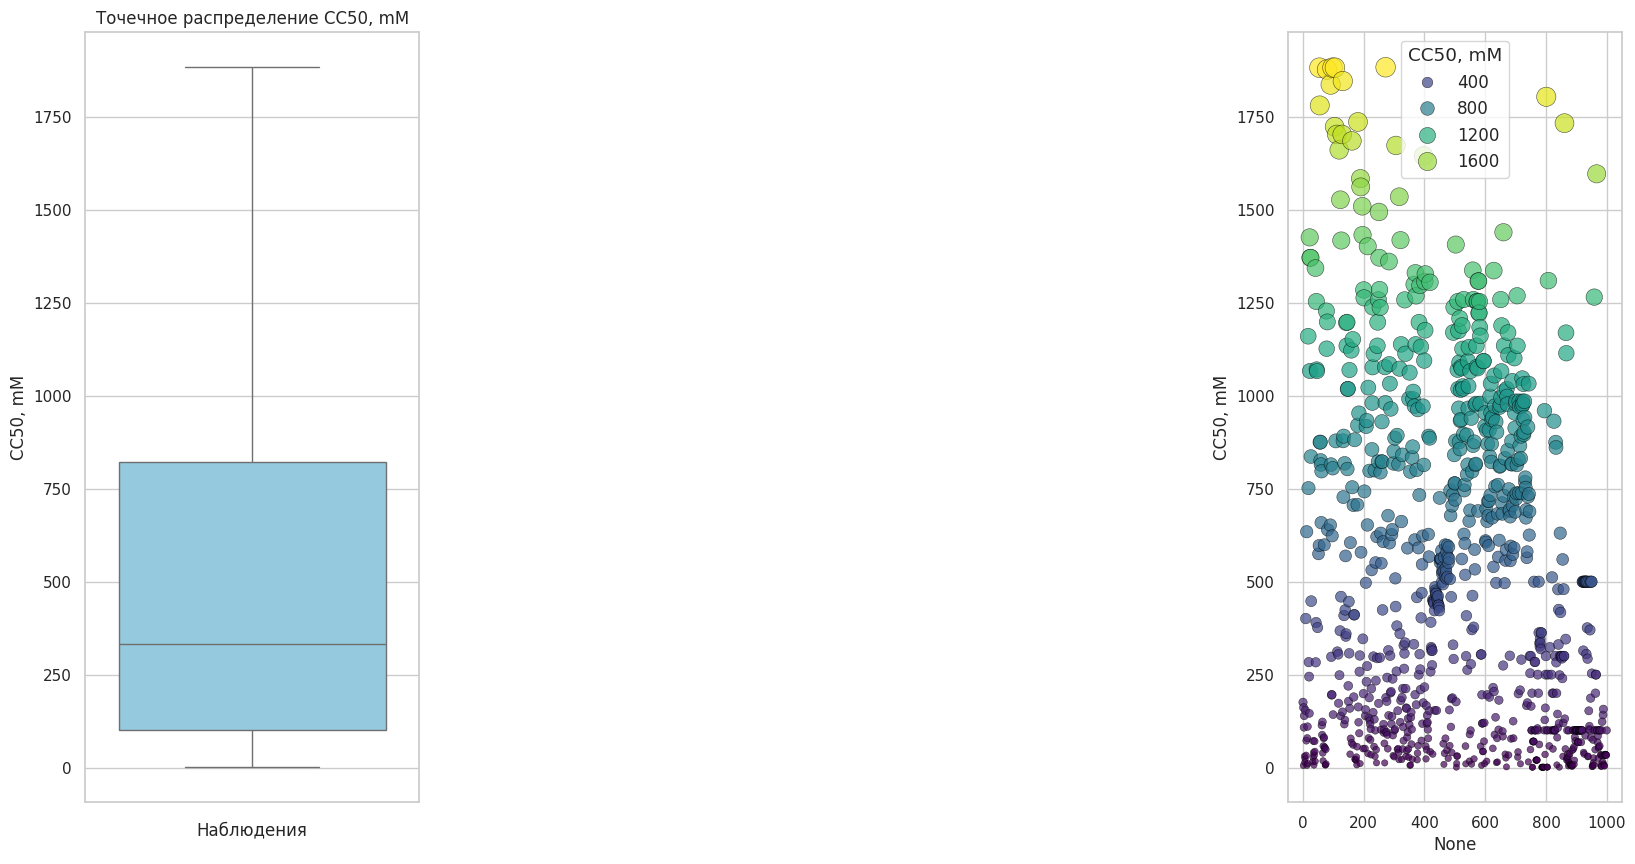

In [ ]:
visualize_column(dataset_for_CC50, 'CC50, mM')

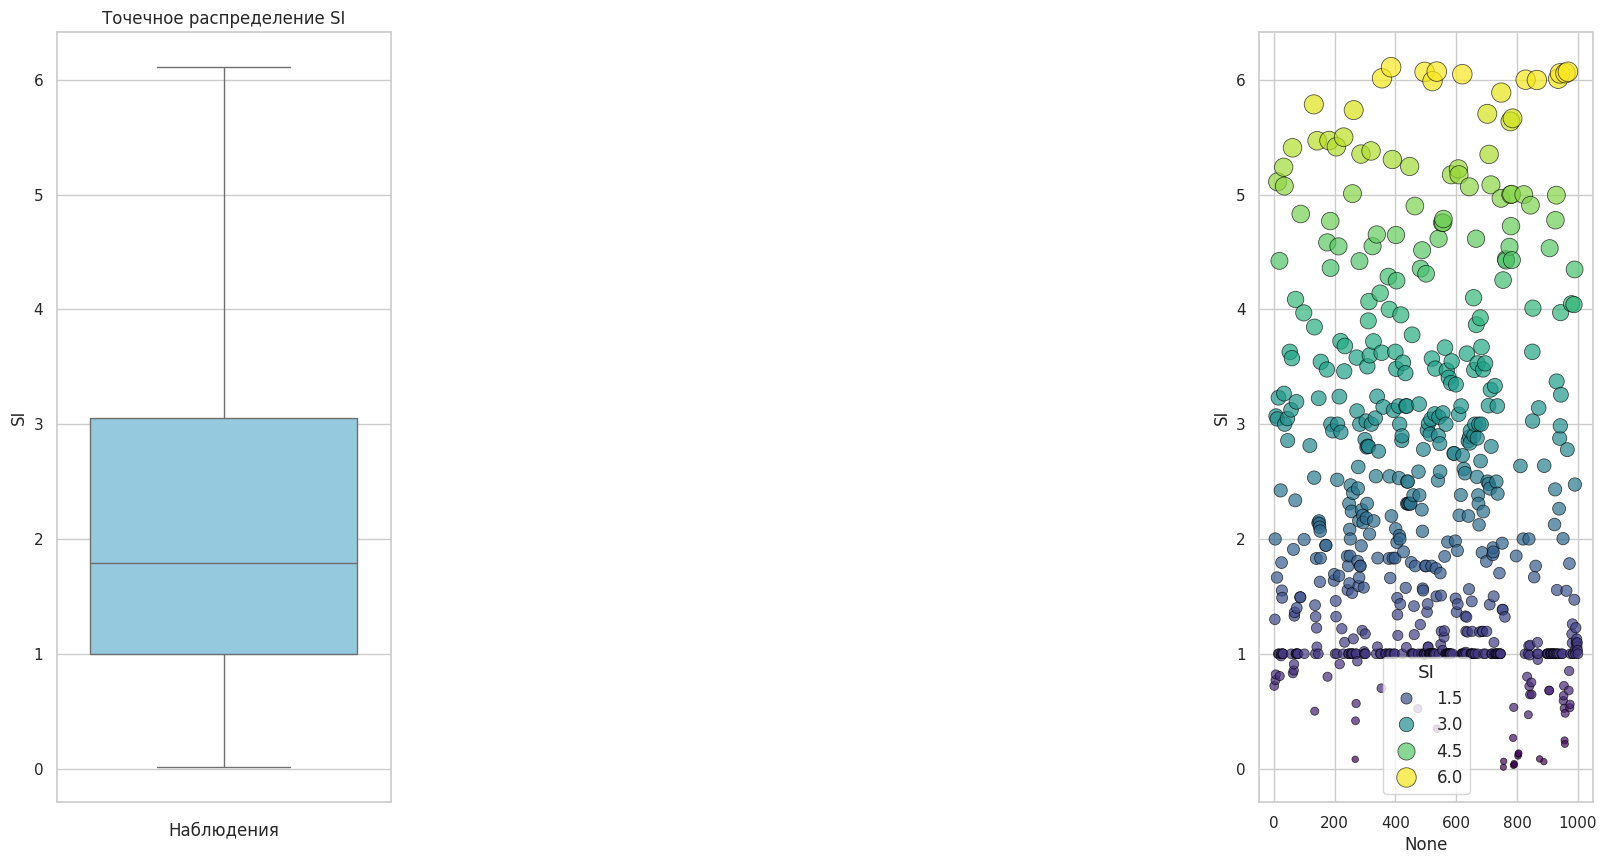

In [ ]:
visualize_column(dataset_for_SI, 'SI')

ВЫбросы удалены. Дальше будем работать с новыми датасетами.

Посмотрим корреляции признаков в каждом полученном датасете.



In [ ]:
# Для построения тепловой карты корреляций признаков в датасете
def dataset_heatmap(df, figsize=(26, 22), annot=False, cmap='coolwarm'):

    plt.figure(figsize=figsize)
    corr = df.corr()
    sns.heatmap(corr, annot=annot, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title('Тепловая карта корреляций')
    plt.show()

Сначала для IC50

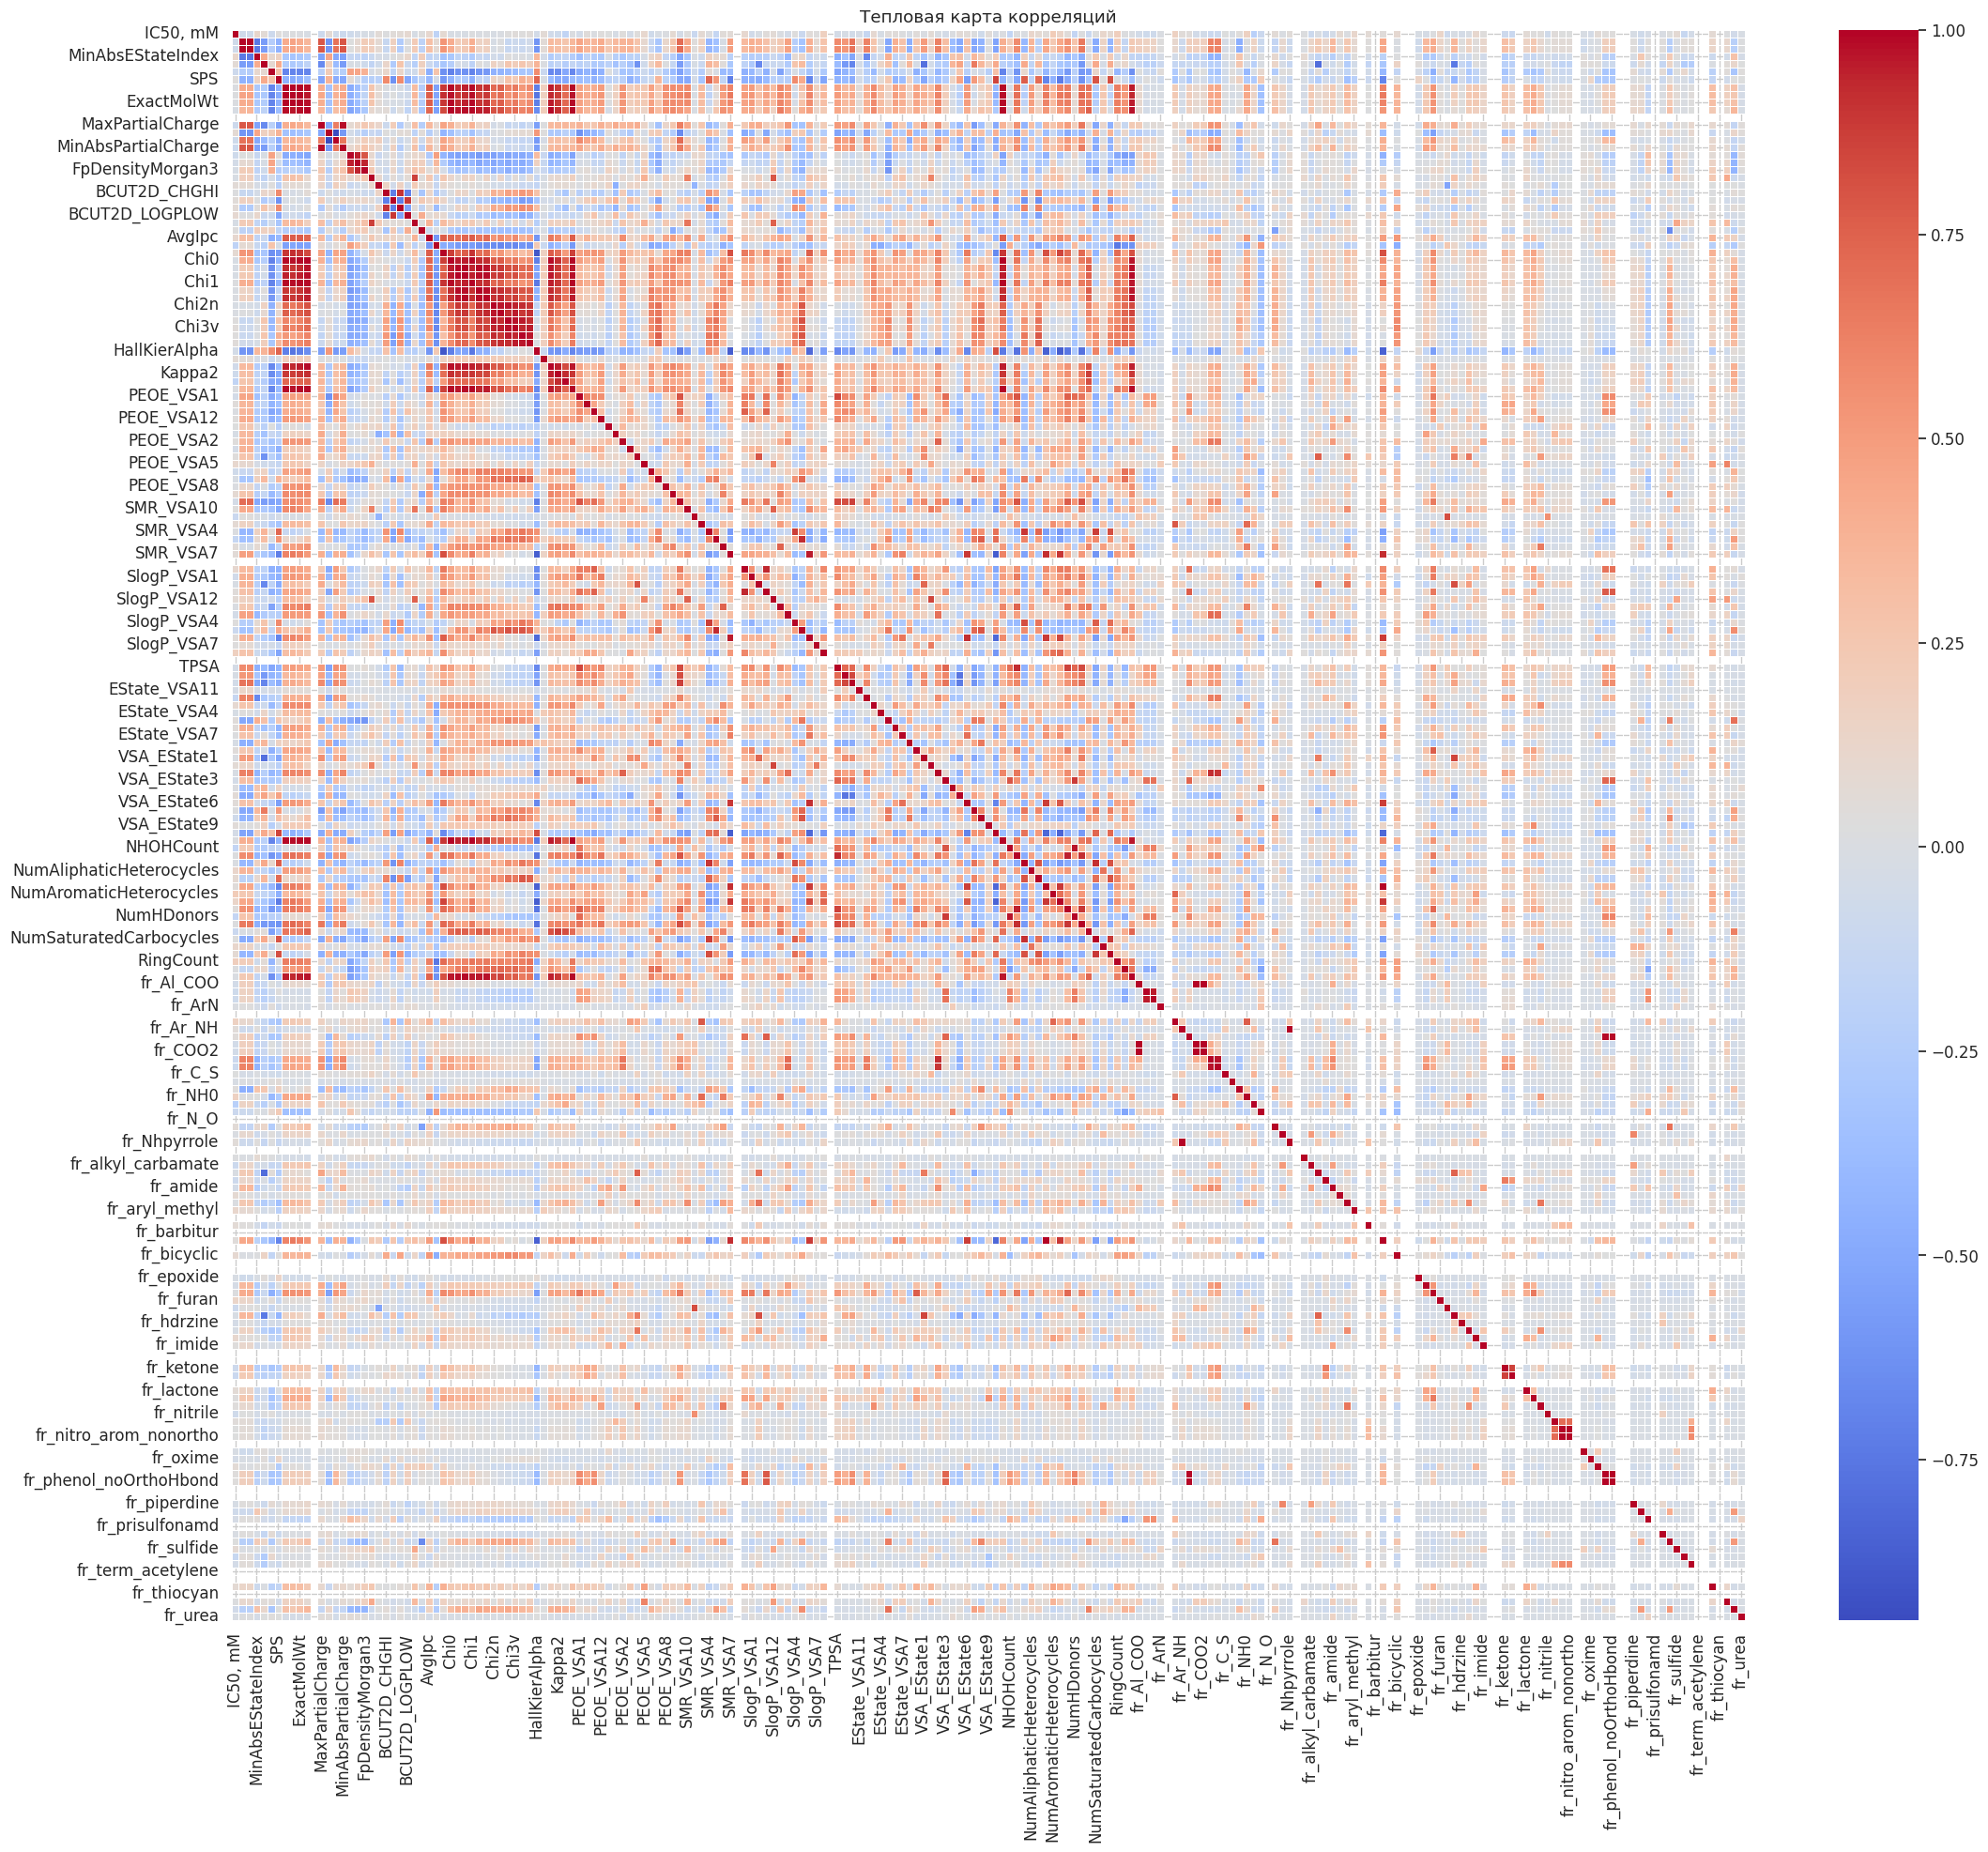

In [ ]:
dataset_heatmap(dataset_for_IC50)

По тепловым картам видим, что основные корреляции сосредоточены в левом верхнем квадранте.

Выведем признаки, коррелирубщие с переменной IC50:

In [ ]:
# Для отображения корреляции переменной с другими признаками

def target_corr(df, target_col, top_n=None):

    corr_series = df.corr()[target_col].drop(target_col).sort_values(ascending=False, key=abs)
    if top_n is not None:
        corr_series = corr_series.head(top_n)
    print(f"Корреляция признаков с переменной '{target_col}':")
    print(corr_series)

In [ ]:
target_corr(dataset_for_IC50, 'IC50, mM')

Корреляция признаков с переменной 'IC50, mM':
fr_NH1                    -0.214035
NumAromaticHeterocycles    0.213147
RingCount                  0.193544
SlogP_VSA8                 0.173767
BalabanJ                  -0.171858
                             ...   
fr_phos_ester                   NaN
fr_prisulfonamd                 NaN
fr_term_acetylene               NaN
fr_tetrazole                    NaN
fr_thiocyan                     NaN
Name: IC50, mM, Length: 210, dtype: float64


Видим значения NaN. Это константы, чья дисперсия равна 0. Удалим их из нашего датасета.

In [ ]:
def target_corr_clean(df, target_col, top_n=None):

    corr_series = df.corr()[target_col].drop(target_col)
    nan_cols = corr_series[corr_series.isna()].index.tolist()
    if nan_cols:
        print(f"Удалены столбцы с NaN корреляцией с '{target_col}': {nan_cols}")
        df_clean = df.drop(columns=nan_cols)
        corr_series = corr_series.drop(nan_cols)
    else:
        print("Нет столбцов с NaN корреляцией.")
        df_clean = df.copy()
    corr_series = corr_series.sort_values(ascending=False, key=abs)
    if top_n is not None:
        corr_series = corr_series.head(top_n)
    print(f"Корреляция признаков с целевым столбцом '{target_col}':")
    print(corr_series)
    return df_clean

In [ ]:
dataset_for_IC50 = target_corr_clean(dataset_for_IC50, 'IC50, mM')

Удалены столбцы с NaN корреляцией с 'IC50, mM': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_Ar_COO', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'IC50, mM':
fr_NH1                    -0.214035
NumAromaticHeterocycles    0.213147
RingCount                  0.193544
SlogP_VSA8                 0.173767
BalabanJ                  -0.171858
                             ...   
Chi1n                     -0.002445
MolMR                      0.002302
VSA_EState1                0.001562
SlogP_VSA2                -0.001209
Chi2v                     -0.000801
Name: IC50, mM, Length: 189, dtype: float64


Удалим признаки с высокой взаимной корреляцией:

In [ ]:
def remove_highly_correlated_features(df, target_col, threshold=0.7):

    # Корреляции только по признакам (без целевого)
    corr_matrix = df.drop(columns=[target_col]).corr().abs()
    # Верхний треугольник матрицы
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = set()

    # Предварительно считаем |corr| с целевой
    target_corr = df.corr()[target_col].abs().drop(index=target_col, errors='ignore')

    # Все пары с |corr| > threshold
    pairs = upper.stack()
    pairs = pairs[pairs > threshold]

    for (col2, col1), _ in pairs.items():
        corr1 = target_corr.get(col1, 0.0)
        corr2 = target_corr.get(col2, 0.0)
        if corr1 < corr2:
            to_drop.add(col1)
        else:
            to_drop.add(col2)

    if to_drop:
        print(f"Удалены признаки с высокой взаимной корреляцией (>{threshold}): {sorted(to_drop)}")
    else:
        print("Нет признаков с высокой взаимной корреляцией")
    df_clean = df.drop(columns=sorted(to_drop), errors='ignore')
    return df_clean, list(to_drop)

In [ ]:
dataset_for_IC50, dropped = remove_highly_correlated_features(dataset_for_IC50, 'IC50, mM')

Удалены признаки с высокой взаимной корреляцией (>0.7): ['BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_MRHI', 'BCUT2D_MWHI', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'ExactMolWt', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NOCount', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA11', 'PEOE_VSA7', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA7', 'SPS', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'TPSA', 'VSA_EState1', 'VSA_EState1

Смотрим тепловую карту:

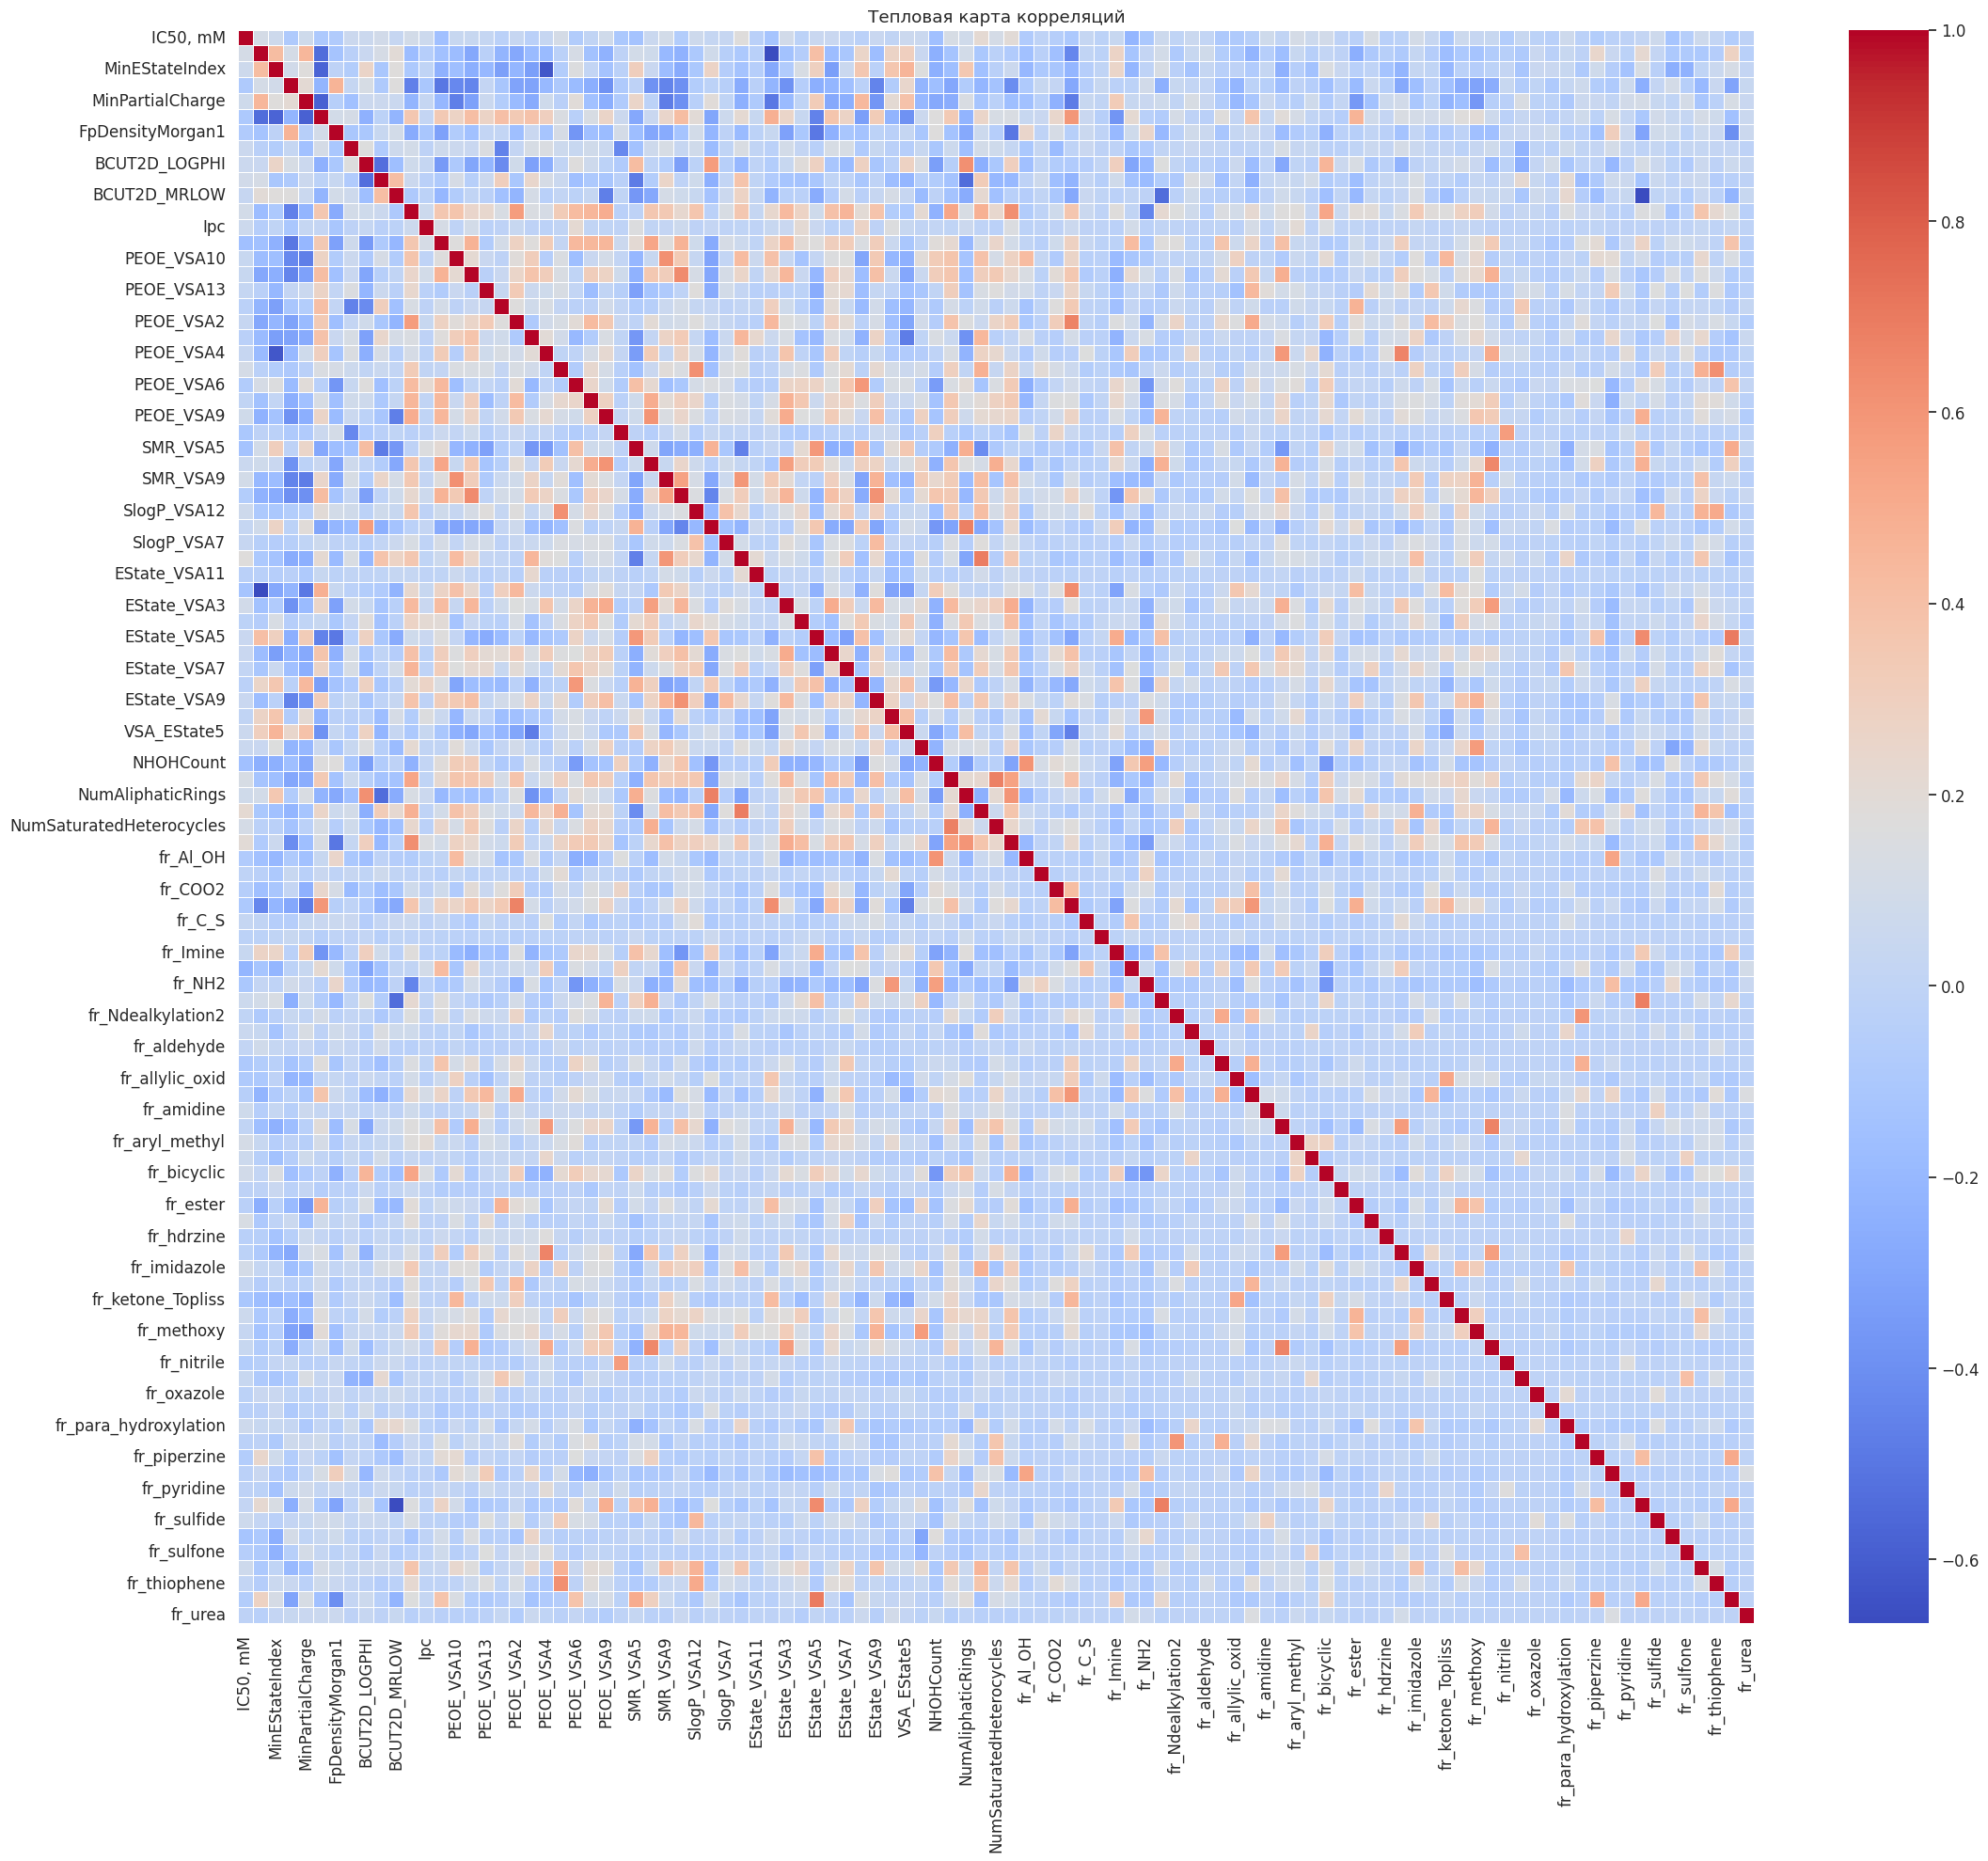

In [ ]:
dataset_heatmap(dataset_for_IC50)

И нормализуем признаки:

In [ ]:
from sklearn.preprocessing import StandardScaler

def normalize_features(df, target_col):

    features = df.drop(columns=[target_col])
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(features_scaled, columns=features.columns, index=df.index)

    df_scaled.insert(0, target_col, df[target_col].values)
    return df_scaled

In [ ]:
dataset_for_IC50 = normalize_features(dataset_for_IC50, 'IC50, mM')

Выводим и тоговый датасет для переменной IC50, на котором будем обучать модели

In [ ]:
dataset_for_IC50.head()

IC50, mM  MinAbsEStateIndex  MinEStateIndex       qed  MinPartialCharge  \
0   6.239374           1.091581        0.812186 -0.693899          1.417532   
1   0.771831           1.913962        0.916955 -0.481805          1.169643   
3   1.705624           1.110524        0.814599 -0.879689          1.417532   
5  15.037911           0.479511        0.734210  0.686731          0.105841   
6  18.908167           1.329499        0.842496 -1.111507          1.423179   

   MinAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_LOGPHI  \
0            -1.461317         -2.027856     -0.041828       0.847207   
1            -1.675169         -2.176614     -0.057839       0.918887   
3            -1.461317         -2.120189     -0.041789       0.847265   
5            -1.263144         -0.706886     -0.041921       0.810227   
6            -0.692512         -2.355886     -0.069667       1.047362   

   BCUT2D_LOGPLOW  ...  fr_priamide  fr_pyridine  fr_quatN  fr_sulfide  \
0        0.407820  ...    -0.196116    -0.170406 -0.201969   -0.239542   
1       -0.229360  ...    -0.196116    -0.170406 -0.201969   -0.239542   
3        0.408853  ...    -0.196116    -0.170406 -0.201969   -0.239542   
5        0.425349  ...    -0.196116    -0.170406 -0.201969   -0.239542   
6       -0.882720  ...    -0.196116    -0.170406  5.523844   -0.239542   

   fr_sulfonamd  fr_sulfone  fr_thiazole  fr_thiophene  fr_unbrch_alkane  \
0     -0.111803    -0.08429     -0.23636     -0.232171          1.872373   
1     -0.111803    -0.08429     -0.23636     -0.232171          1.872373   
3     -0.111803    -0.08429     -0.23636     -0.232171          2.564442   
5     -0.111803    -0.08429     -0.23636     -0.232171         -0.203837   
6     -0.111803    -0.08429     -0.23636     -0.232171         -0.203837   

    fr_urea  
0 -0.059496  
1 -0.059496  
3 -0.059496  
5 -0.059496  
6 -0.059496  

[5 rows x 101 columns]

Сохраняем файл

In [ ]:
dataset_for_IC50.to_csv('dataset_for_IC50.csv', index=False)

Повторим с переменной CC50

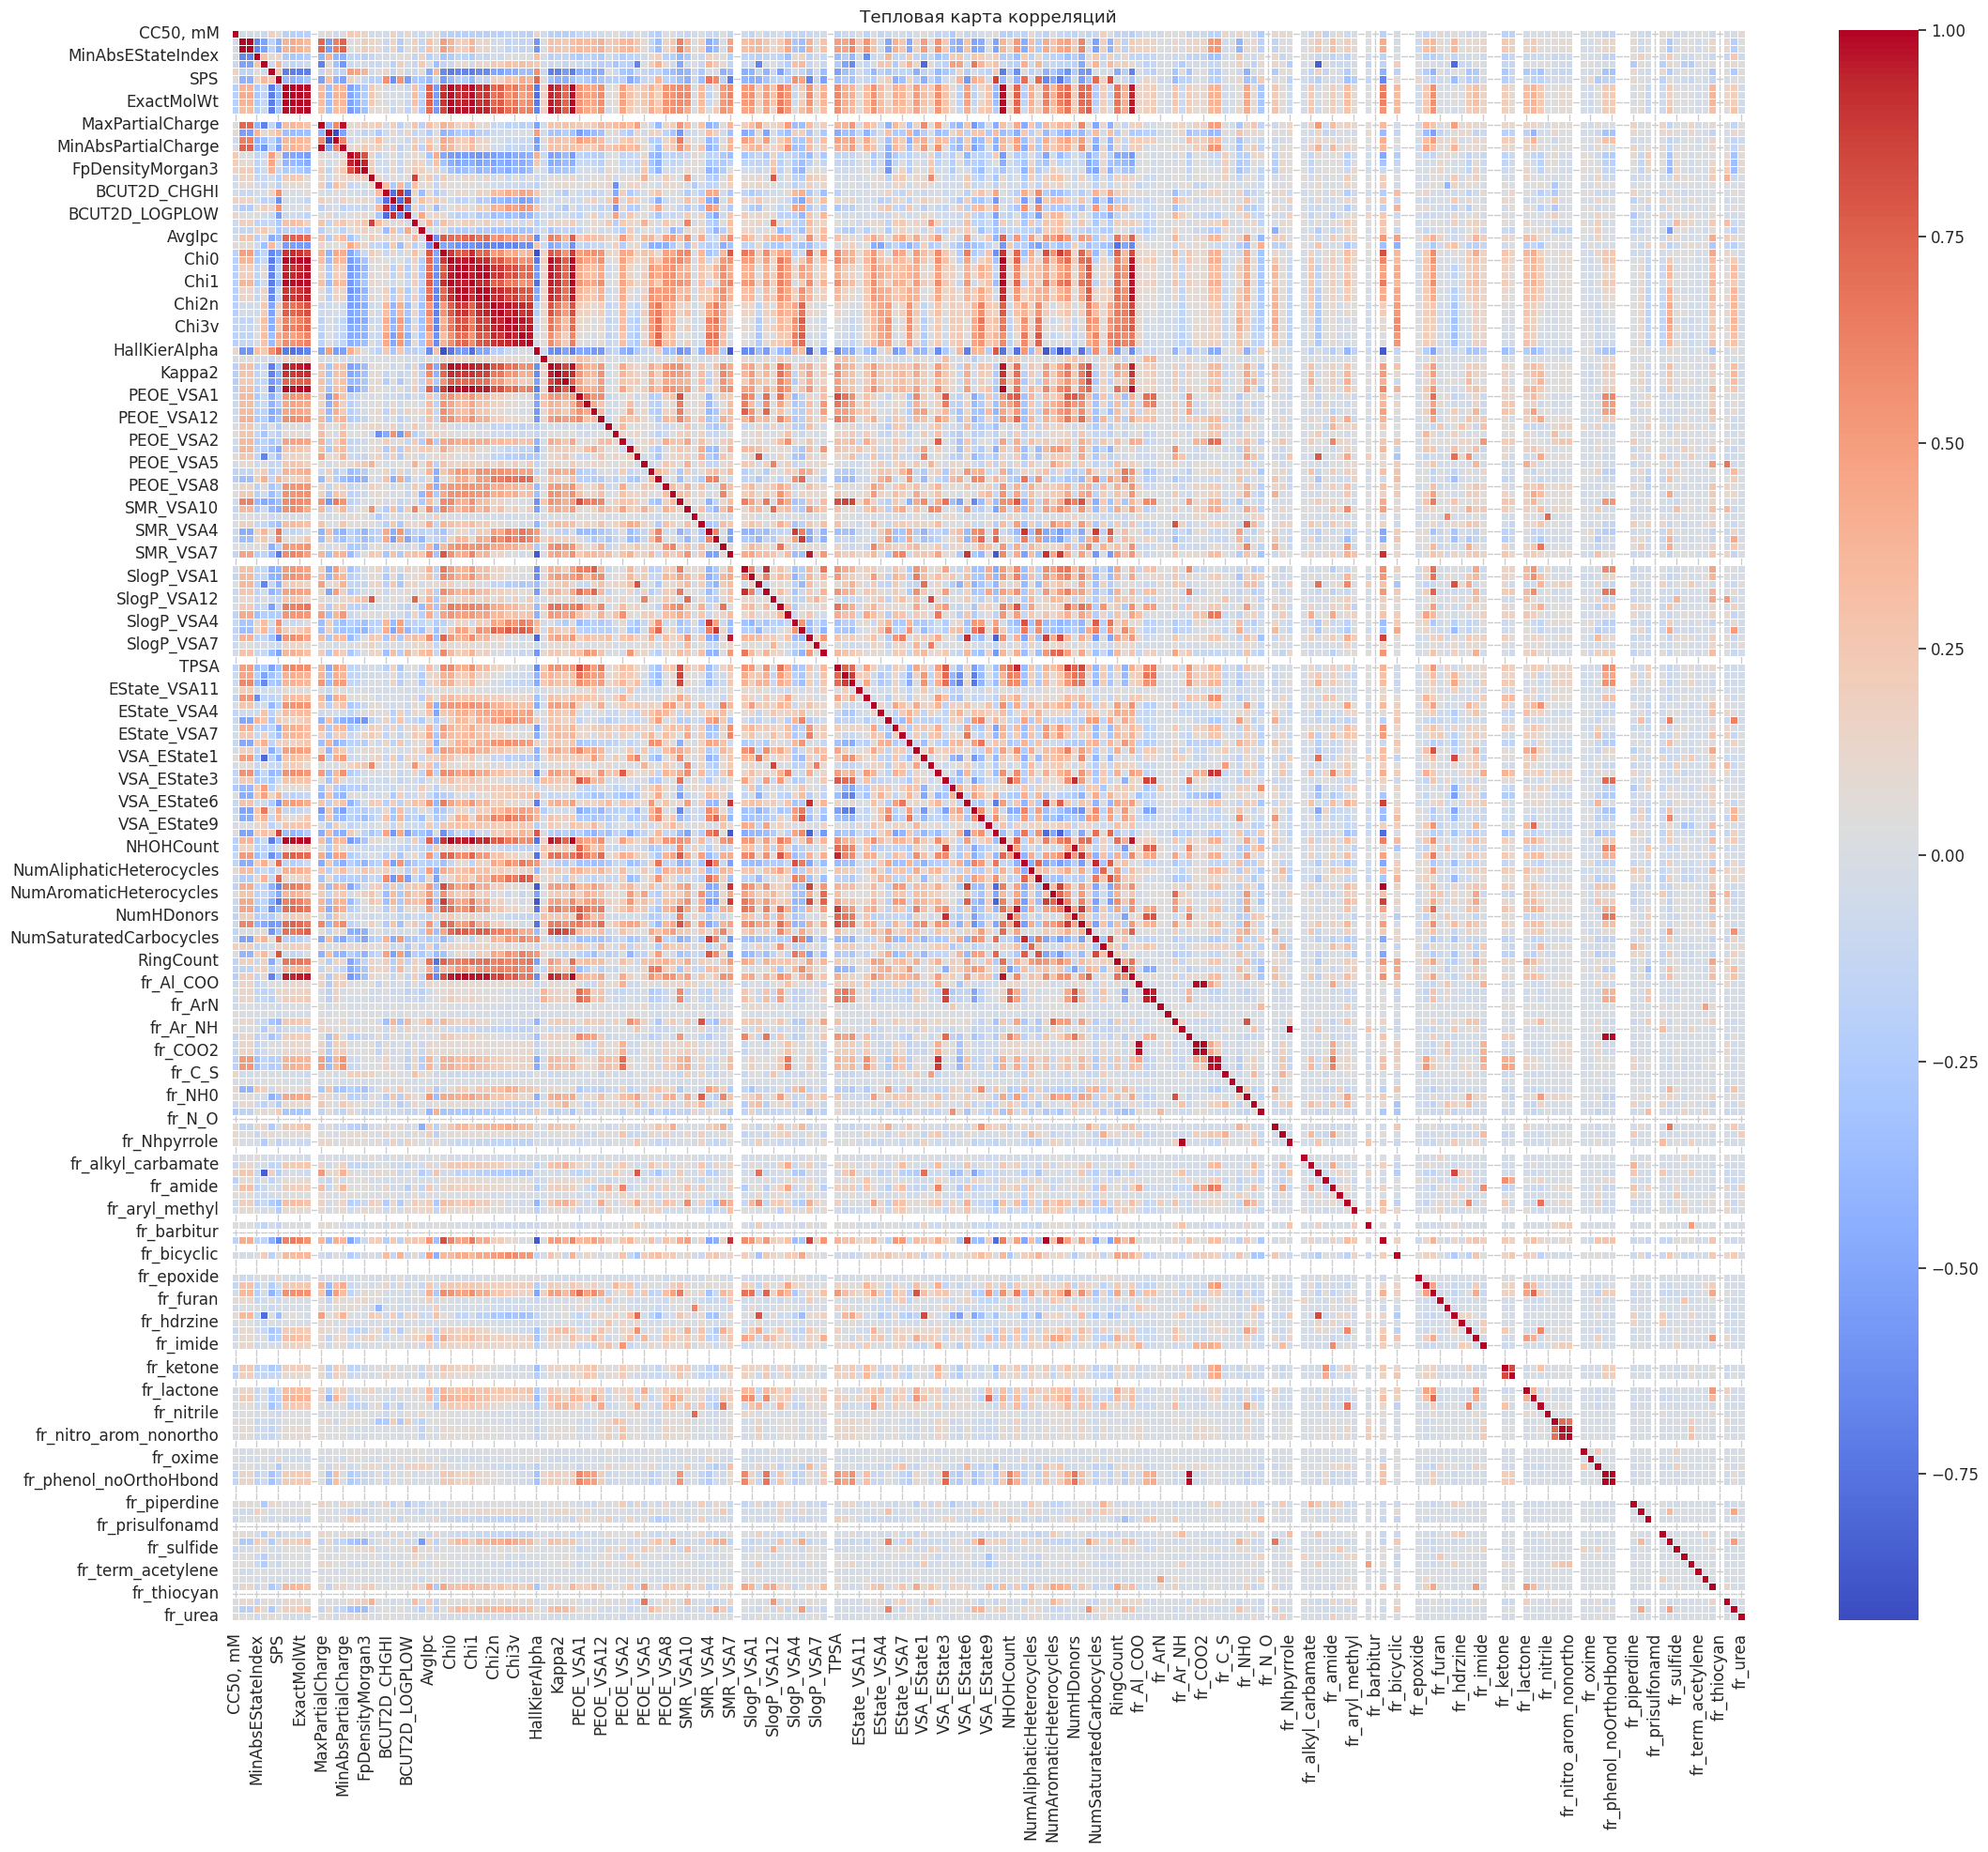

In [ ]:
dataset_heatmap(dataset_for_CC50)

Как и в случае с переменной IC50, основная корреляция для признака СС50 находится в верхнем левом квадрате матрицы.

Выводим признаки, коррелирующие с переменной IC50:

In [ ]:
target_corr(dataset_for_CC50, 'CC50, mM')

Корреляция признаков с переменной 'CC50, mM':
VSA_EState4        -0.245125
fr_NH2             -0.230569
FpDensityMorgan1    0.225688
PEOE_VSA7          -0.218992
Kappa3             -0.214545
                      ...   
fr_nitroso               NaN
fr_phos_acid             NaN
fr_phos_ester            NaN
fr_prisulfonamd          NaN
fr_thiocyan              NaN
Name: CC50, mM, Length: 210, dtype: float64


Убираем значения NaN.

In [ ]:
dataset_for_CC50 = target_corr_clean(dataset_for_CC50, 'CC50, mM')

Удалены столбцы с NaN корреляцией с 'CC50, mM': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'CC50, mM':
VSA_EState4        -0.245125
fr_NH2             -0.230569
FpDensityMorgan1    0.225688
PEOE_VSA7          -0.218992
Kappa3             -0.214545
                      ...   
VSA_EState10       -0.003858
fr_thiophene        0.003665
VSA_EState9         0.002200
fr_imide           -0.002019
PEOE_VSA13          0.000097
Name: CC50, mM, Length: 192, dtype: float64


Также удаляем признаки с высокой взаимной корреляцией:

In [ ]:
dataset_for_CC50, dropped = remove_highly_correlated_features(dataset_for_CC50, 'CC50, mM')

Удалены признаки с высокой взаимной корреляцией (>0.7): ['AvgIpc', 'BCUT2D_CHGHI', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MWHI', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MolMR', 'MolWt', 'NOCount', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA2', 'PEOE_VSA4', 'RingCount', 'SMR_VSA1', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA7', '

Снова смотрим тепловую карту.

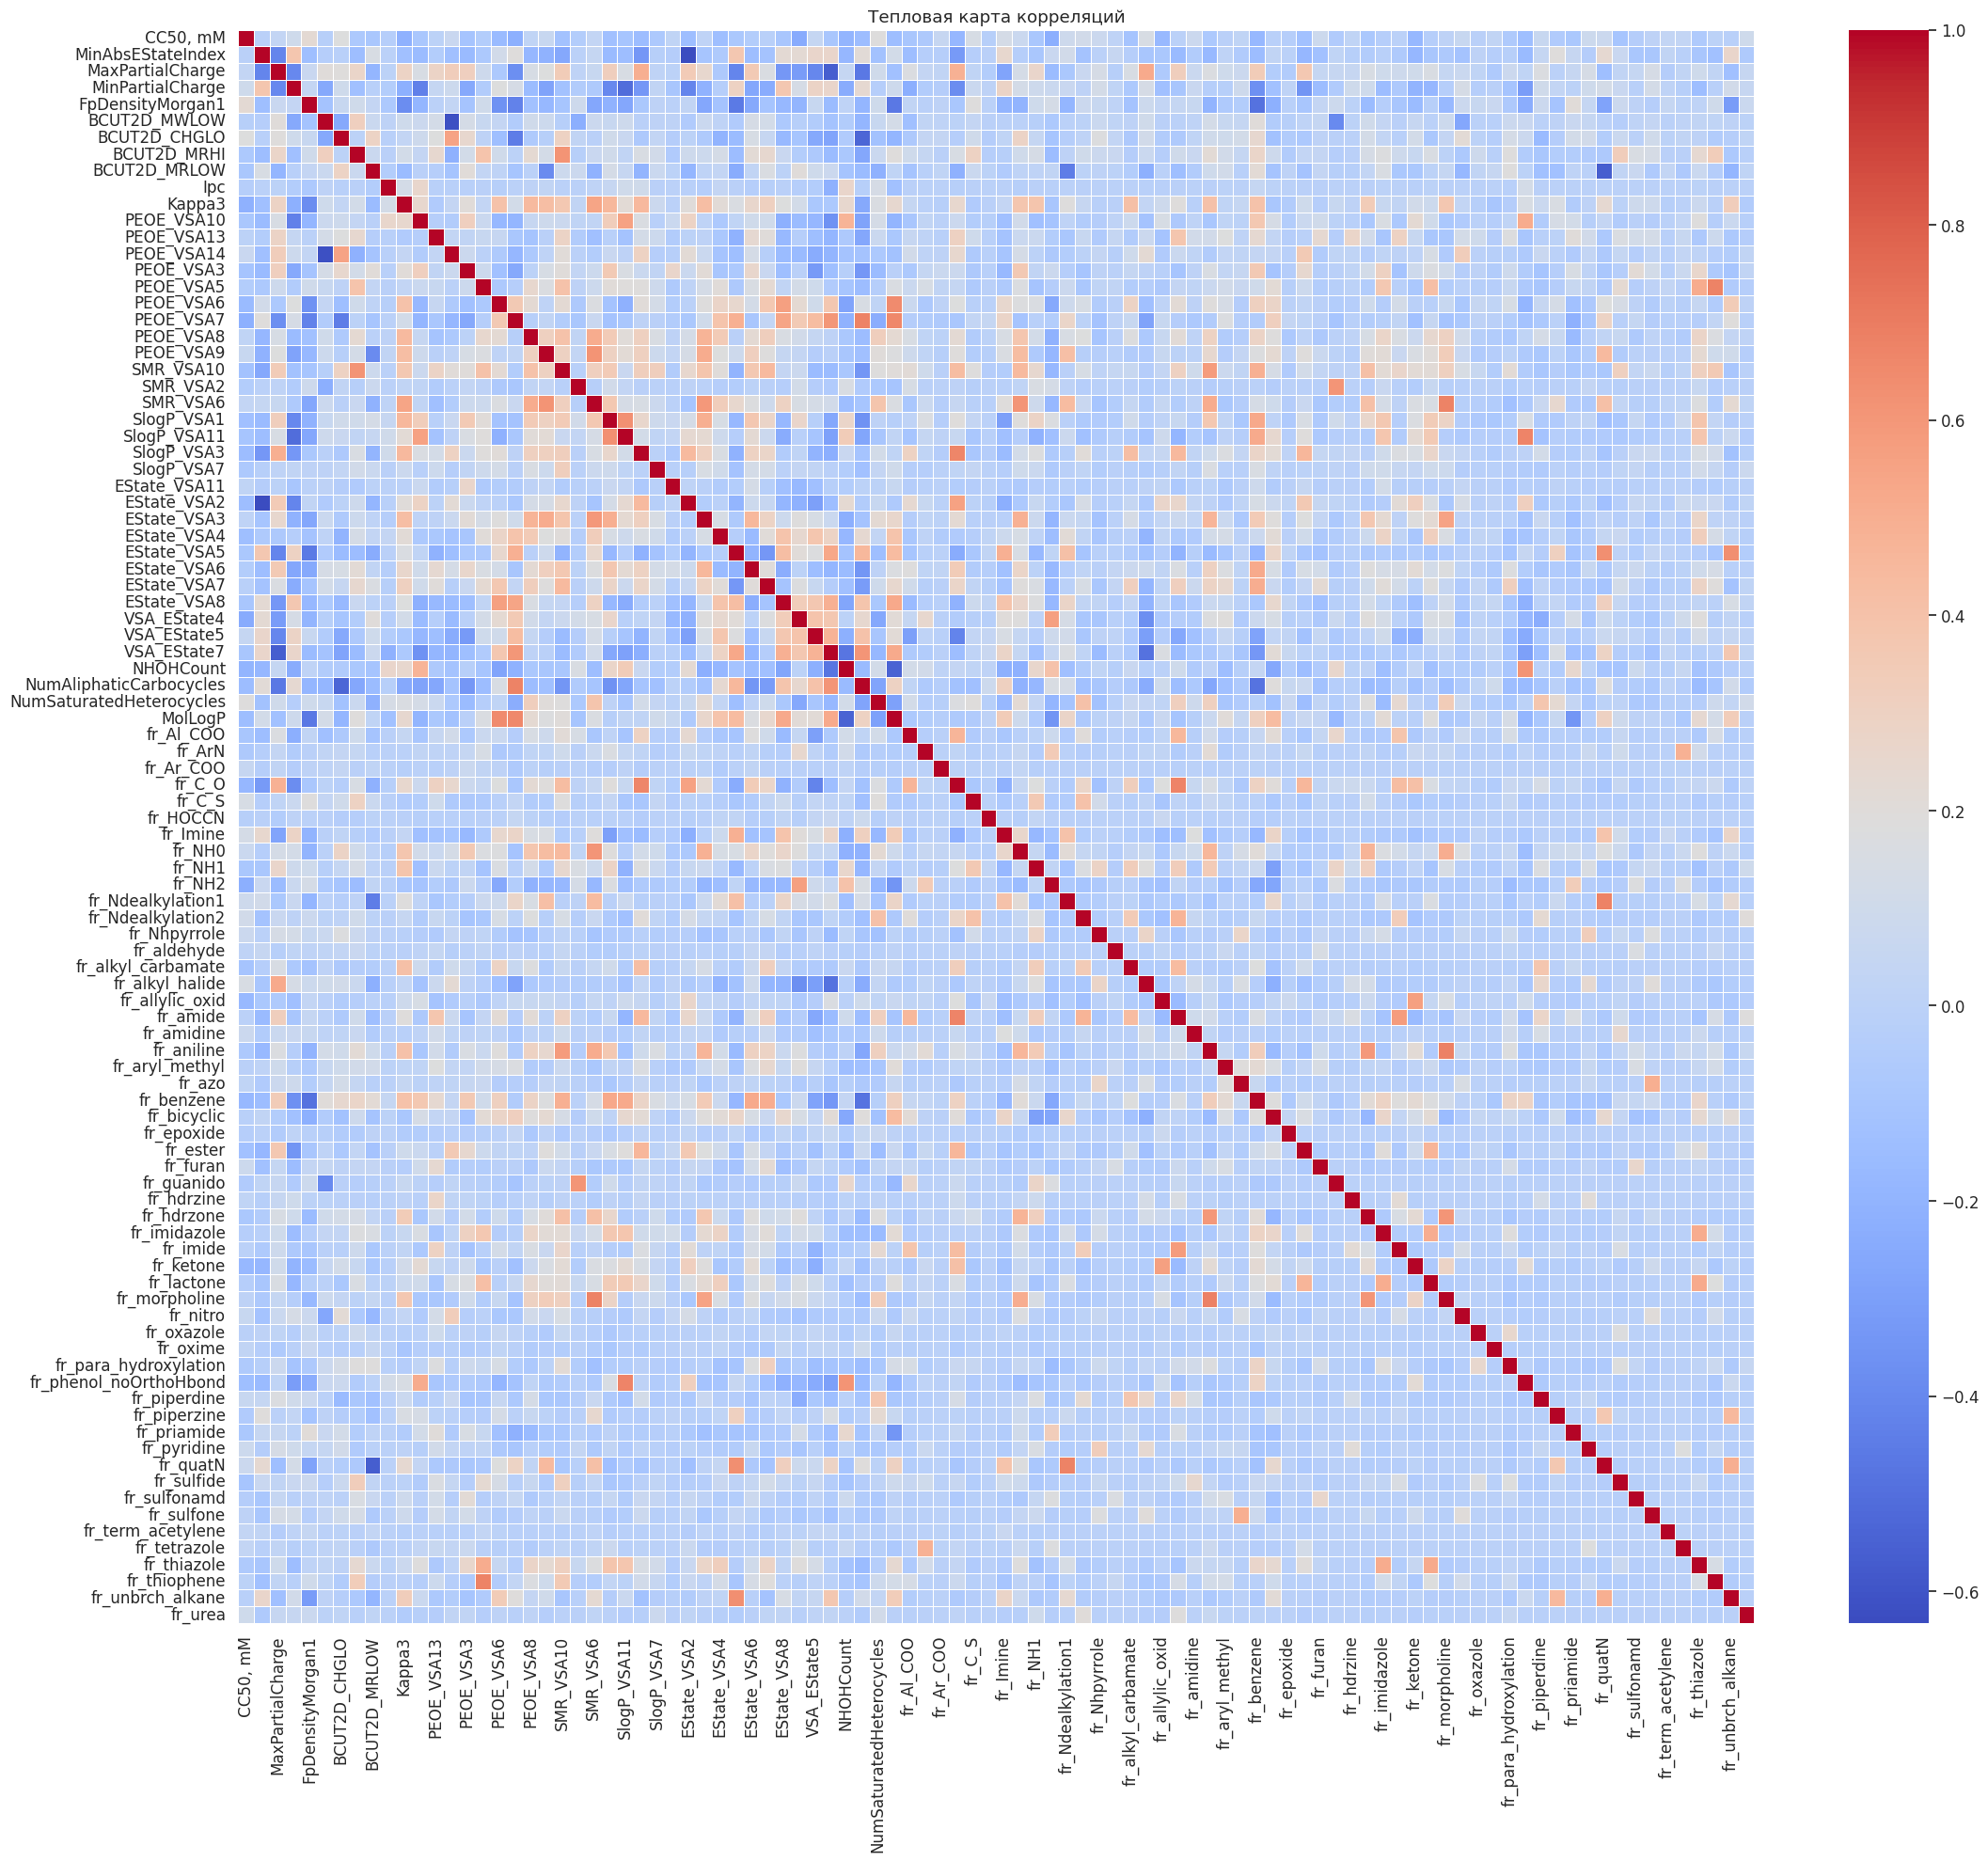

In [ ]:
dataset_heatmap(dataset_for_CC50)

Нормализуем признаки:

In [ ]:
dataset_for_IC50 = normalize_features(dataset_for_CC50, 'CC50, mM')

И выводим итоговый датасет для CC50

In [ ]:
dataset_for_CC50.head()

CC50, mM  MinAbsEStateIndex  MaxPartialCharge  MinPartialCharge  \
0  175.482382           0.387225          0.038844         -0.293526   
1    5.402819           0.533868          0.012887         -0.313407   
2  161.142320           0.543231          0.094802         -0.325573   
3  107.855654           0.390603          0.038844         -0.293526   
4  139.270991           0.270476          0.062897         -0.257239   

   FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGLO  BCUT2D_MRHI  BCUT2D_MRLOW  \
0          0.642857      9.700470     -2.343082     5.944519      0.193481   
1          0.607143      9.689226     -2.394690     5.134527      0.120322   
2          0.562500      9.681293     -2.477203     5.117187     -0.922902   
3          0.620690      9.700497     -2.342885     5.944502      0.193510   
4          0.600000      9.700386     -2.342009     5.963448      0.193687   

            Ipc  ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0  2.187750e+06  ...         0           0             0           0   
1  2.187750e+06  ...         0           0             0           0   
2  8.610751e+06  ...         2           0             0           0   
3  3.572142e+06  ...         0           0             0           0   
4  1.053758e+08  ...         0           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                  0             0            0             0   
1                  0             0            0             0   
2                  0             0            0             0   
3                  0             0            0             0   
4                  0             0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 3        0  
1                 3        0  
2                 3        0  
3                 4        0  
4                 0        0  

[5 rows x 96 columns]

Сохраняем

In [ ]:
dataset_for_CC50.to_csv('dataset_for_CC50.csv', index=False)

Дальше работаем с переменной SI

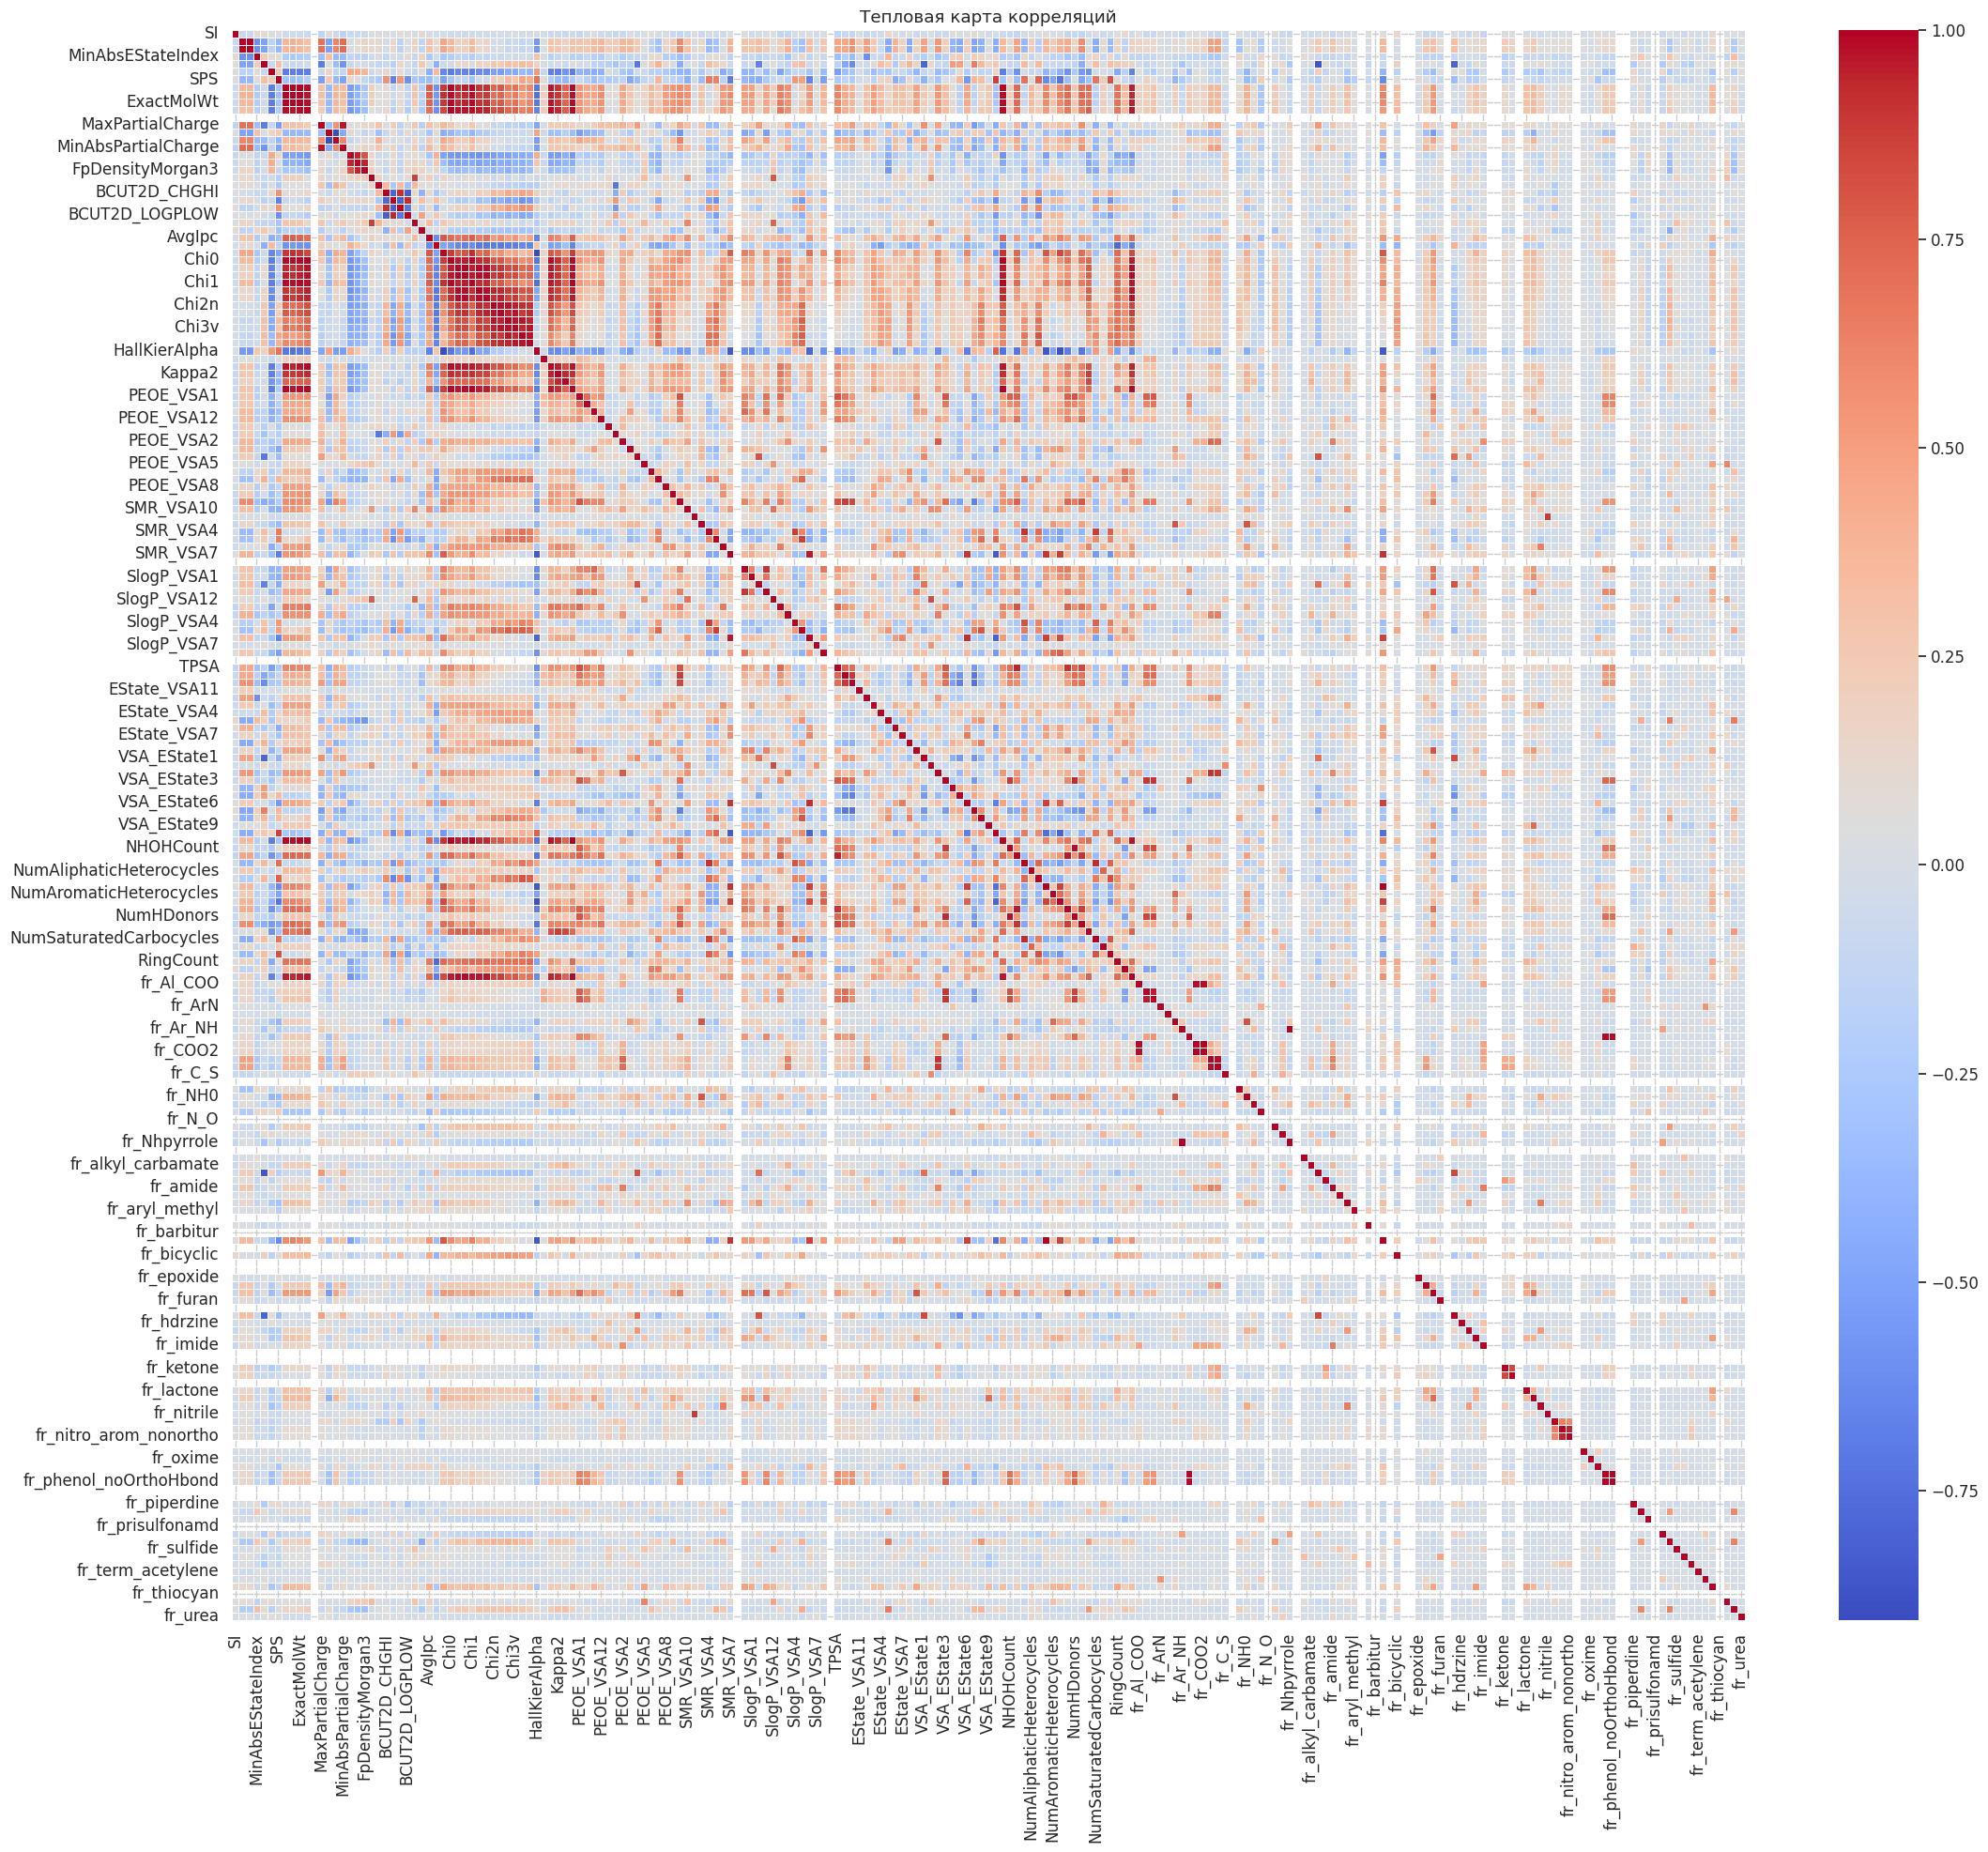

In [ ]:
dataset_heatmap(dataset_for_SI)

Снова основная корреляция в верхнем левом квадрате матрицы.

Выводим признаки, коррелирующие с переменной IS:

In [ ]:
target_corr(dataset_for_SI, 'SI')

Корреляция признаков с переменной 'SI':
MinAbsPartialCharge   -0.154862
SlogP_VSA2            -0.144809
NOCount               -0.144757
MaxPartialCharge      -0.143489
EState_VSA5            0.140017
                         ...   
fr_nitroso                  NaN
fr_phos_acid                NaN
fr_phos_ester               NaN
fr_prisulfonamd             NaN
fr_thiocyan                 NaN
Name: SI, Length: 210, dtype: float64


Удаляем значения NaN и признаки с высокой взаимной корреляцией.

In [ ]:
dataset_for_CC50 = target_corr_clean(dataset_for_SI, 'SI')

Удалены столбцы с NaN корреляцией с 'SI': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_HOCCN', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_guanido', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'SI':
MinAbsPartialCharge   -0.154862
SlogP_VSA2            -0.144809
NOCount               -0.144757
MaxPartialCharge      -0.143489
EState_VSA5            0.140017
                         ...   
BCUT2D_MRHI            0.000899
PEOE_VSA8              0.000643
BCUT2D_CHGLO           0.000451
fr_oxime               0.000130
SMR_VSA4               0.000080
Name: SI, Length: 190, dtype: float64


In [ ]:
dataset_for_SI, dropped = remove_highly_correlated_features(dataset_for_SI, 'SI')

Удалены признаки с высокой взаимной корреляцией (>0.7): ['AvgIpc', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MWLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MaxPartialCharge', 'MinPartialCharge', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA2', 'PEOE_VSA4', 'PEOE_VSA7', 'RingCount', 'SMR_VSA1', 'SMR_VSA4', 

Тепловая матрица

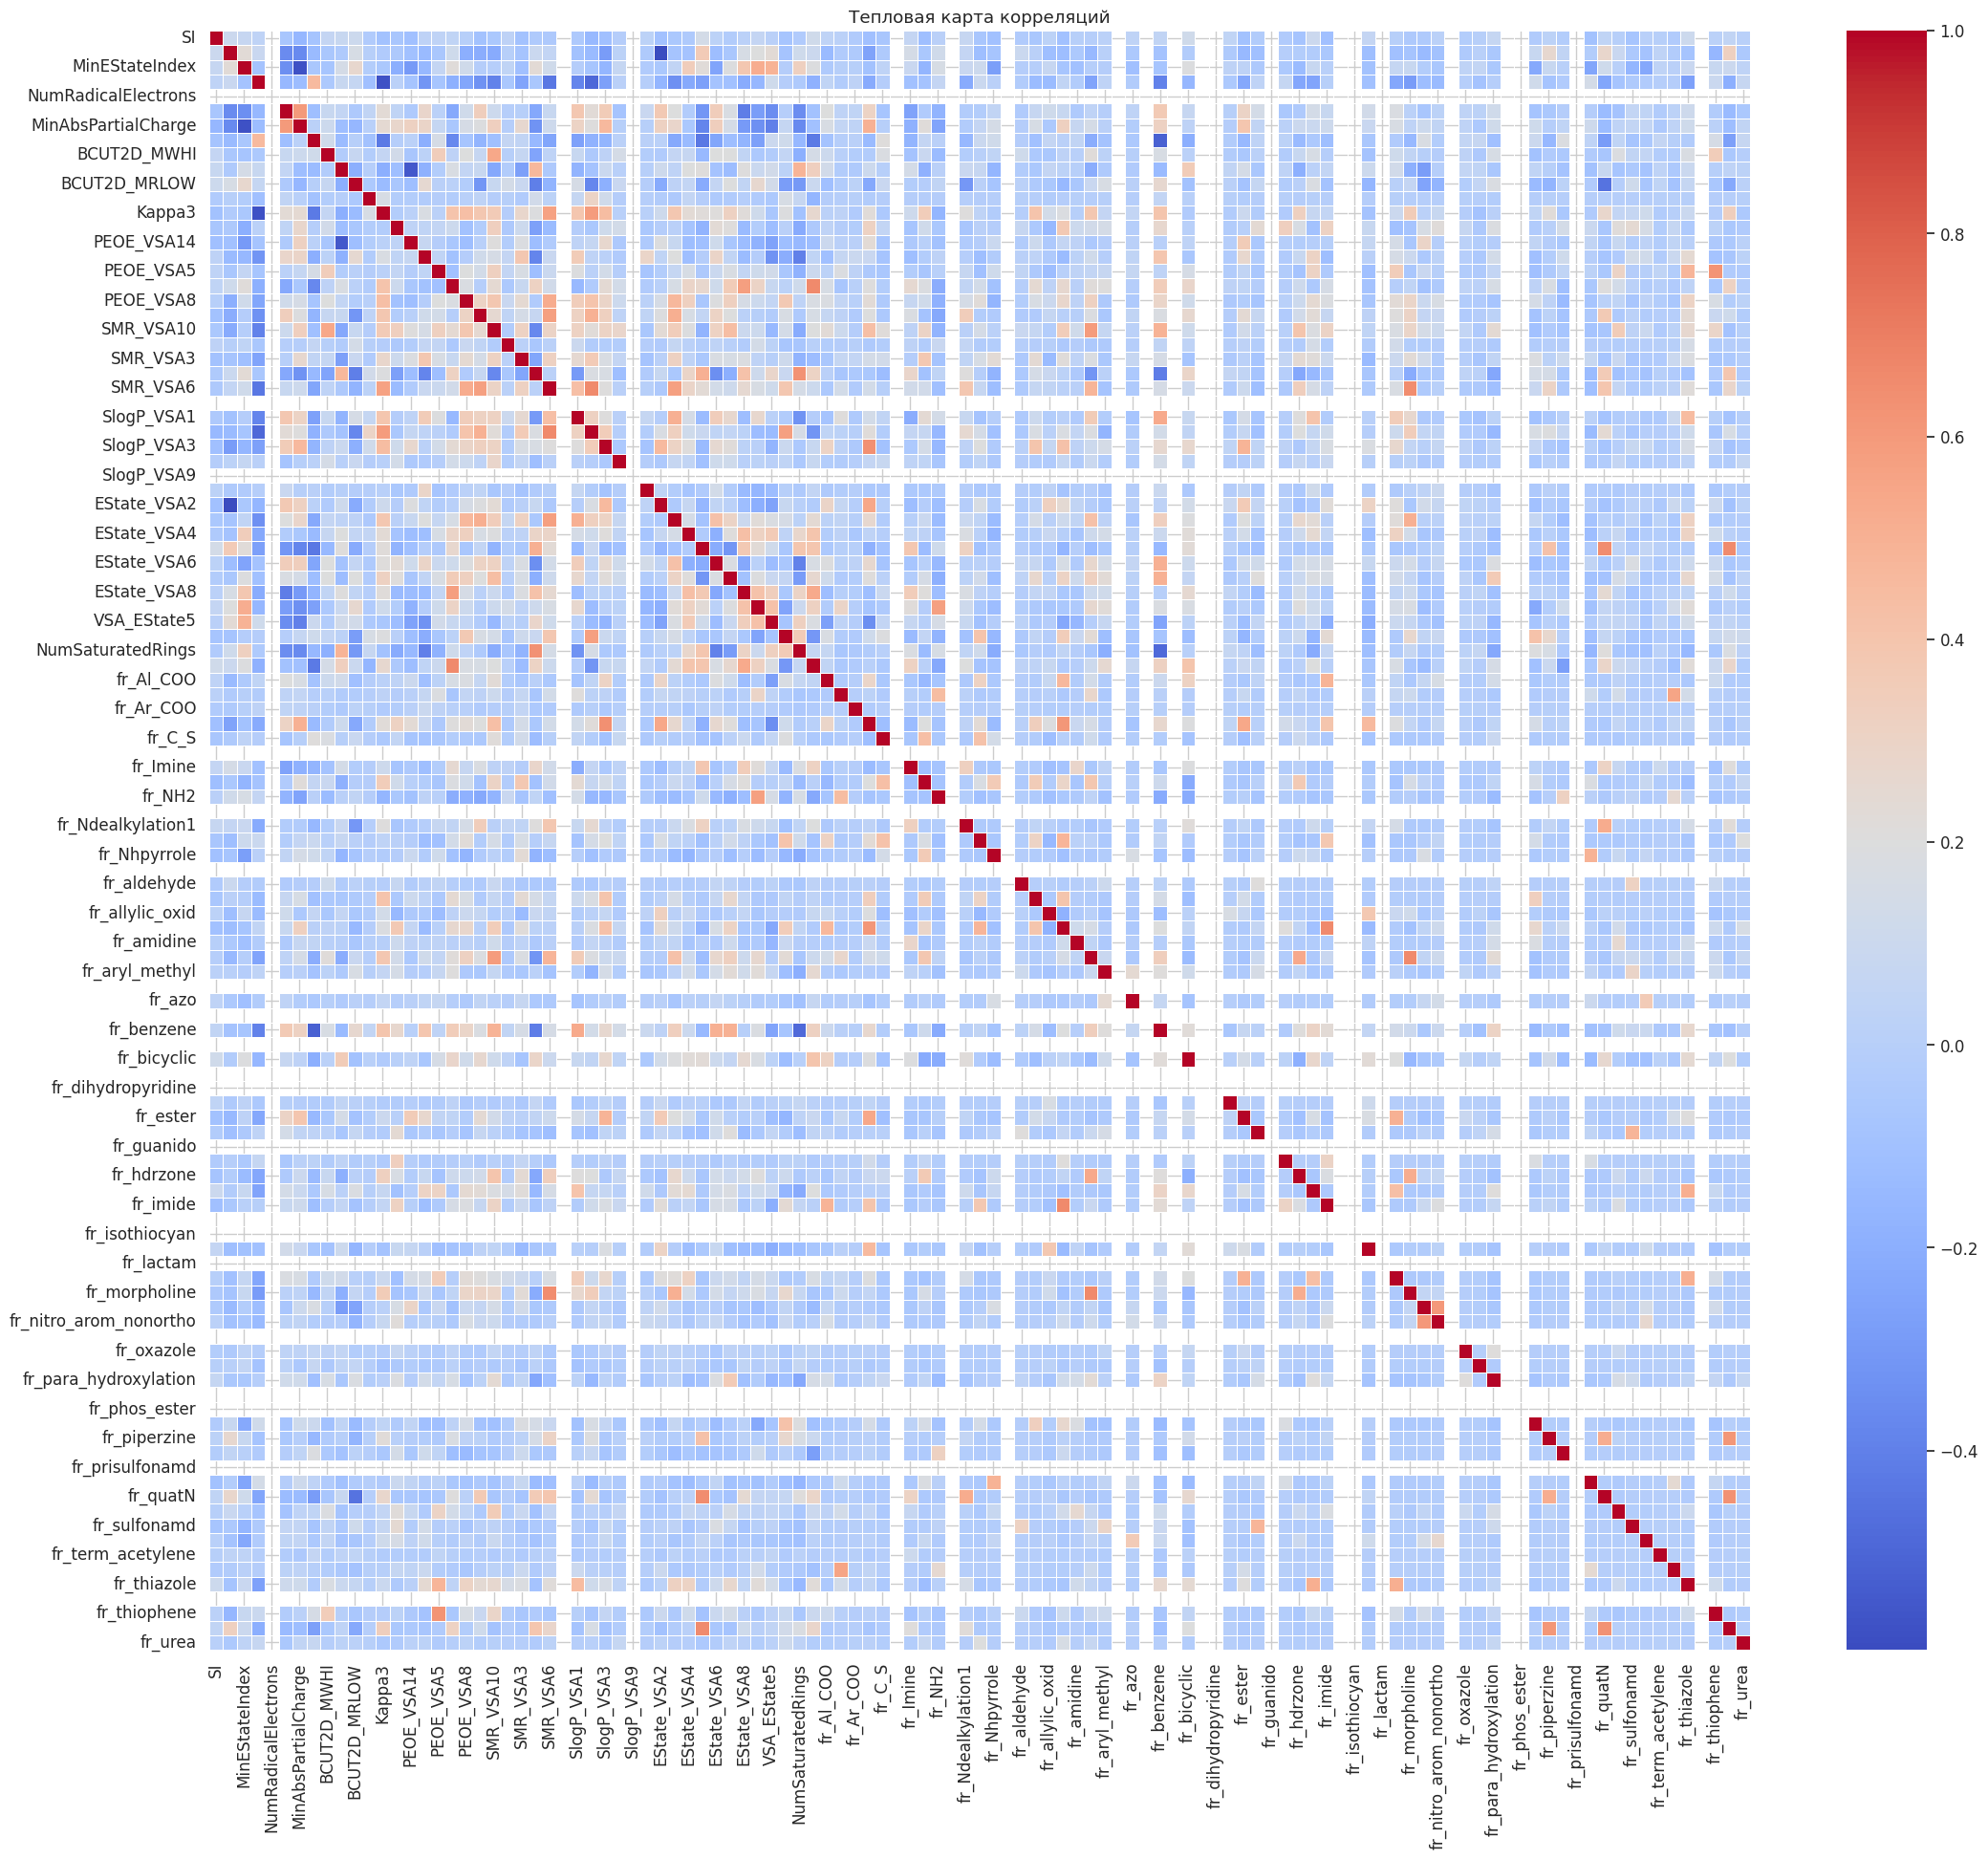

In [ ]:
dataset_heatmap(dataset_for_SI)

Нормализация признаков

In [ ]:
dataset_for_SI = normalize_features(dataset_for_SI, 'SI')

Итоговый датасет

In [ ]:
dataset_for_SI.head()

SI  MinAbsEStateIndex  MinEStateIndex       qed  NumRadicalElectrons  \
2  0.72           2.219433        1.010896 -1.480657                  0.0   
4  1.30           0.586044        0.848677 -0.695292                  0.0   
5  2.00           0.631598        0.853201  0.621971                  0.0   
6  0.77           1.539252        0.943344 -1.164781                  0.0   
7  0.82          -0.555548        0.508641 -1.684294                  0.0   

   MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWHI  \
2            -1.222469            -1.203421         -2.358568    -0.549777   
4            -2.136001            -1.475175         -2.201844    -0.583322   
5            -0.244484            -1.475175         -0.697289    -0.583980   
6            -1.656959            -0.885210         -2.351871    -0.549323   
7            -0.820744            -0.088024         -2.169065    -0.498517   

   BCUT2D_LOGPHI  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
2       1.074318  ...   -0.219382     -0.092608   -0.101535   
4       0.930748  ...   -0.219382     -0.092608   -0.101535   
5       0.879909  ...   -0.219382     -0.092608   -0.101535   
6       1.092105  ...   -0.219382     -0.092608   -0.101535   
7       0.636753  ...   -0.219382     -0.092608   -0.101535   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
2          -0.041274     -0.041274    -0.219382          0.0     -0.294748   
4          -0.041274     -0.041274    -0.219382          0.0     -0.294748   
5          -0.041274     -0.041274    -0.219382          0.0     -0.294748   
6          -0.041274     -0.041274    -0.219382          0.0     -0.294748   
7          -0.041274     -0.041274    -0.219382          0.0     -0.294748   

   fr_unbrch_alkane   fr_urea  
2          2.364775 -0.071611  
4         -0.127138 -0.071611  
5         -0.127138 -0.071611  
6         -0.127138 -0.071611  
7          3.195413 -0.071611  

[5 rows x 111 columns]

In [ ]:
dataset_for_SI.to_csv('dataset_for_SI.csv', index=False)

Теперь будем формировать датасеты для классификации.

Для этого вычислим медианы для целевых переменных, сформируем признак, принимающий значение 1, когда целевая переменная превышает своё медианное значение по датасету и 0, когда значение переменной меньше или равно медианному.

In [ ]:
dataset.head()

IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0           0             0           0                  0             0   
1           0             0           0                  0             0   
2           0             0           0                  0             0   
3           0             0           0                  0             0   
4           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 213 columns]

ВЫчисляем медианы и добавляем константу SI

In [ ]:
IC50_median = dataset['IC50, mM'].median()
print(f'Медианное значение IC50: {round(IC50_median,2)}')

CC50_median = dataset['CC50, mM'].median()
print(f'Медианное значение CC50: {round(CC50_median,2)}')

SI_median = dataset['SI'].median()
print(f'Медианное значение SI: {round(SI_median,2)}')

SI_CONST = 8
print(f'Константа SI: {round(SI_CONST)}')

Медианное значение IC50: 46.59
Медианное значение CC50: 411.04
Медианное значение SI: 3.85
Константа SI: 8


Сформируем датасеты по медианным значениям целевых переменных

In [ ]:
# Датасет для IC50
dataset_IC50_median = dataset

dataset_IC50_median['High_IC50'] = (dataset_IC50_median['IC50, mM'] > IC50_median).astype(int)
cols = ['High_IC50'] + [col for col in dataset_IC50_median.columns if col != 'High_IC50']
dataset_IC50_median = dataset_IC50_median[cols]

dataset_IC50_median = dataset_IC50_median.drop(['CC50, mM', 'IC50, mM', 'SI'], axis=1)
dataset_IC50_median.head()

High_IC50  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0          0           5.094096        5.094096           0.387225   
1          0           3.961417        3.961417           0.533868   
2          1           2.627117        2.627117           0.543231   
3          0           5.097360        5.097360           0.390603   
4          1           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

In [ ]:
# Датасет для CC50
dataset_CC50_median = dataset

dataset_CC50_median['High_CC50'] = (dataset_CC50_median['CC50, mM'] > CC50_median).astype(int)
cols = ['High_CC50'] + [col for col in dataset_CC50_median.columns if col != 'High_CC50']
dataset_CC50_median = dataset_CC50_median[cols]

dataset_CC50_median = dataset_CC50_median.drop(['CC50, mM', 'IC50, mM', 'SI', 'High_IC50'], axis=1)
dataset_CC50_median.head()

High_CC50  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0          0           5.094096        5.094096           0.387225   
1          0           3.961417        3.961417           0.533868   
2          0           2.627117        2.627117           0.543231   
3          0           5.097360        5.097360           0.390603   
4          0           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

In [ ]:
# Датасет для SI
dataset_SI_median = dataset

dataset_SI_median['High_SI'] = (dataset_SI_median['SI'] > SI_median).astype(int)
cols = ['High_SI'] + [col for col in dataset_SI_median.columns if col != 'High_SI']
dataset_SI_median = dataset_SI_median[cols]

dataset_SI_median = dataset_SI_median.drop(['CC50, mM', 'IC50, mM', 'SI', 'High_IC50', 'High_CC50'], axis=1)
dataset_SI_median.head()

High_SI  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0        1           5.094096        5.094096           0.387225   
1        1           3.961417        3.961417           0.533868   
2        0           2.627117        2.627117           0.543231   
3        1           5.097360        5.097360           0.390603   
4        0           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

Для переменной SI сформируем датасет с учётом заданной константы

In [ ]:
dataset_SI_const = dataset

dataset_SI_const['SI_CONST'] = (dataset_SI_const['SI'] > SI_CONST).astype(int)
cols = ['SI_CONST'] + [col for col in dataset_SI_const.columns if col != 'SI_CONST']
dataset_SI_const = dataset_SI_const[cols]

dataset_SI_const = dataset_SI_const.drop(['CC50, mM', 'IC50, mM', 'SI', 'High_CC50', 'High_IC50', 'High_SI'], axis=1)
dataset_SI_const.head()

SI_CONST  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0         1           5.094096        5.094096           0.387225   
1         0           3.961417        3.961417           0.533868   
2         0           2.627117        2.627117           0.543231   
3         1           5.097360        5.097360           0.390603   
4         0           5.150510        5.150510           0.270476   

   MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0        0.387225  0.417362  42.928571  384.652         340.300  384.350449   
1        0.533868  0.462473  45.214286  388.684         340.300  388.381750   
2        0.543231  0.260923  42.187500  446.808         388.344  446.458903   
3        0.390603  0.377846  41.862069  398.679         352.311  398.366099   
4        0.270476  0.429038  36.514286  466.713         424.377  466.334799   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 211 columns]

Посмотрим корреляции

In [ ]:
target_corr(dataset_IC50_median, 'High_IC50')

Корреляция признаков с переменной 'High_IC50':
NumSaturatedHeterocycles    0.231725
SlogP_VSA5                 -0.202180
NumAliphaticHeterocycles    0.192135
VSA_EState8                -0.189516
NumAliphaticCarbocycles    -0.179115
                              ...   
fr_nitroso                       NaN
fr_phos_acid                     NaN
fr_phos_ester                    NaN
fr_prisulfonamd                  NaN
fr_thiocyan                      NaN
Name: High_IC50, Length: 210, dtype: float64


In [ ]:
target_corr(dataset_CC50_median, 'High_CC50')

Корреляция признаков с переменной 'High_CC50':
fr_NH2                     -0.266451
NumSaturatedHeterocycles    0.223004
NHOHCount                  -0.219937
fr_NH0                      0.213581
NumAliphaticCarbocycles    -0.209026
                              ...   
fr_nitroso                       NaN
fr_phos_acid                     NaN
fr_phos_ester                    NaN
fr_prisulfonamd                  NaN
fr_thiocyan                      NaN
Name: High_CC50, Length: 210, dtype: float64


In [ ]:
target_corr(dataset_SI_median, 'High_SI')

Корреляция признаков с переменной 'High_SI':
NumSaturatedHeterocycles   -0.167611
VSA_EState1                -0.161905
FractionCSP3                0.161325
NumSaturatedCarbocycles     0.158591
MaxAbsEStateIndex          -0.157832
                              ...   
fr_nitroso                       NaN
fr_phos_acid                     NaN
fr_phos_ester                    NaN
fr_prisulfonamd                  NaN
fr_thiocyan                      NaN
Name: High_SI, Length: 210, dtype: float64


In [ ]:
target_corr(dataset_SI_const, 'SI_CONST')

Корреляция признаков с переменной 'SI_CONST':
FractionCSP3                0.198086
fr_Imine                    0.195061
SMR_VSA7                   -0.182356
SlogP_VSA6                 -0.172906
NumAliphaticHeterocycles   -0.168147
                              ...   
fr_nitroso                       NaN
fr_phos_acid                     NaN
fr_phos_ester                    NaN
fr_prisulfonamd                  NaN
fr_thiocyan                      NaN
Name: SI_CONST, Length: 210, dtype: float64


Удалим признаки NaN

In [ ]:
dataset_IC50_median = target_corr_clean(dataset_IC50_median, 'High_IC50')

Удалены столбцы с NaN корреляцией с 'High_IC50': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'High_IC50':
NumSaturatedHeterocycles    0.231725
SlogP_VSA5                 -0.202180
NumAliphaticHeterocycles    0.192135
VSA_EState8                -0.189516
NumAliphaticCarbocycles    -0.179115
                              ...   
VSA_EState5                -0.001573
BCUT2D_MRHI                -0.001020
TPSA                       -0.000956
fr_thiazole                 0.000234
fr_oxazole                  0.000063
Name: High_IC50, Length: 192, dtype: float64


In [ ]:
dataset_CC50_median = target_corr_clean(dataset_CC50_median, 'High_CC50')

Удалены столбцы с NaN корреляцией с 'High_CC50': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'High_CC50':
fr_NH2                     -0.266451
NumSaturatedHeterocycles    0.223004
NHOHCount                  -0.219937
fr_NH0                      0.213581
NumAliphaticCarbocycles    -0.209026
                              ...   
MaxAbsPartialCharge        -0.005762
RingCount                  -0.003372
SMR_VSA1                    0.002693
VSA_EState2                 0.001692
fr_unbrch_alkane            0.001328
Name: High_CC50, Length: 192, dtype: float64


In [ ]:
dataset_SI_median = target_corr_clean(dataset_SI_median, 'High_SI')

Удалены столбцы с NaN корреляцией с 'High_SI': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'High_SI':
NumSaturatedHeterocycles   -0.167611
VSA_EState1                -0.161905
FractionCSP3                0.161325
NumSaturatedCarbocycles     0.158591
MaxAbsEStateIndex          -0.157832
                              ...   
BCUT2D_LOGPLOW             -0.003966
fr_morpholine               0.002912
Chi4v                       0.000590
fr_alkyl_carbamate          0.000110
fr_oxazole                  0.000063
Name: High_SI, Length: 192, dtype: float64


In [ ]:
dataset_SI_const = target_corr_clean(dataset_SI_const, 'SI_CONST')

Удалены столбцы с NaN корреляцией с 'SI_CONST': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Корреляция признаков с целевым столбцом 'SI_CONST':
FractionCSP3                0.198086
fr_Imine                    0.195061
SMR_VSA7                   -0.182356
SlogP_VSA6                 -0.172906
NumAliphaticHeterocycles   -0.168147
                              ...   
fr_hdrzine                 -0.002668
fr_aldehyde                -0.002668
Chi4n                       0.002441
VSA_EState9                -0.001940
BCUT2D_LOGPLOW              0.000733
Name: SI_CONST, Length: 192, dtype: float64


Убираем признаки с высокой взаимной корреляцией

In [ ]:
dataset_IC50_median, dropped = remove_highly_correlated_features(dataset_IC50_median, 'High_IC50')
dataset_CC50_median, dropped = remove_highly_correlated_features(dataset_CC50_median, 'High_CC50')
dataset_SI_median, dropped = remove_highly_correlated_features(dataset_SI_median, 'High_SI')
dataset_SI_const, dropped = remove_highly_correlated_features(dataset_SI_const, 'SI_CONST')


Удалены признаки с высокой взаимной корреляцией (>0.7): ['AvgIpc', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA10', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge', 'MinEStateIndex', 'MolMR', 'MolWt', 'NOCount', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumSaturatedCarbocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA2', 'PEOE_VSA4', 'PEOE_VSA7', 'RingCount', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA7', 'SPS', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VS

Нормализуем признаки

In [ ]:
dataset_IC50_median = normalize_features(dataset_IC50_median,'High_IC50')
dataset_CC50_median = normalize_features(dataset_CC50_median,'High_CC50')
dataset_SI_median = normalize_features(dataset_SI_median,'High_SI')
dataset_SI_const = normalize_features(dataset_SI_const,'SI_CONST')

Итоговые датасеты

In [ ]:
dataset_IC50_median.head()

High_IC50  MaxEStateIndex  MinAbsEStateIndex       qed  MinPartialCharge  \
0          0       -1.735571           1.224868 -0.768654          1.426002   
1          0       -2.078199           2.094509 -0.555991          1.174415   
2          1       -2.481816           2.150030 -1.506141          1.020462   
3          0       -1.734583           1.244900 -0.954942          1.426002   
4          1       -1.718506           0.532513 -0.713608          1.885175   

   FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  BCUT2D_LOGPHI  BCUT2D_MRLOW  \
0         -2.770338    -0.570571     -0.088877       0.864587      1.054704   
1         -2.860505    -0.560071     -0.104802       0.930493      0.761047   
2         -3.187359    -0.534044     -0.116039       1.030345     -3.426433   
3         -2.798321    -0.570644     -0.088838       0.864640      1.054822   
4         -2.932638    -0.569964     -0.088996       0.882823      1.055530   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
1  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
2  ...  6.416628   -0.208381     -0.110152    -0.09525          -0.031623   
3  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
4  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane   fr_urea  
0     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
1     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
2     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
3     -0.031623    -0.234082     -0.274204          3.124349 -0.083918  
4     -0.031623    -0.234082     -0.274204         -0.168595 -0.083918  

[5 rows x 104 columns]

In [ ]:
dataset_CC50_median.head()

High_CC50  MinAbsEStateIndex       qed  MaxPartialCharge  MinPartialCharge  \
0          0           1.224868 -0.768654         -1.511418          1.426002   
1          0           2.094509 -0.555991         -1.711378          1.174415   
2          0           2.150030 -1.506141         -1.080347          1.020462   
3          0           1.244900 -0.954942         -1.511418          1.426002   
4          0           0.532513 -0.713608         -1.326120          1.885175   

   FpDensityMorgan2  BCUT2D_MWHI  BCUT2D_MWLOW  BCUT2D_CHGLO  BCUT2D_MRLOW  \
0         -2.461836    -0.570571     -0.088877     -0.014410      1.054704   
1         -2.573286    -0.560071     -0.104802     -0.258058      0.761047   
2         -2.865841    -0.534044     -0.116039     -0.647615     -3.426433   
3         -2.573286    -0.570644     -0.088838     -0.013478      1.054822   
4         -2.662446    -0.569964     -0.088996     -0.009344      1.055530   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
1  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
2  ...  6.416628   -0.208381     -0.110152    -0.09525          -0.031623   
3  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
4  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane   fr_urea  
0     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
1     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
2     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
3     -0.031623    -0.234082     -0.274204          3.124349 -0.083918  
4     -0.031623    -0.234082     -0.274204         -0.168595 -0.083918  

[5 rows x 106 columns]

In [ ]:
dataset_SI_median.head()

High_SI  MaxEStateIndex  MinAbsEStateIndex       qed  MaxAbsPartialCharge  \
0        1       -1.735571           1.224868 -0.768654            -1.606137   
1        1       -2.078199           2.094509 -0.555991            -1.342164   
2        0       -2.481816           2.150030 -1.506141            -1.180632   
3        1       -1.734583           1.244900 -0.954942            -1.606137   
4        0       -1.718506           0.532513 -0.713608            -2.087917   

   FpDensityMorgan3  BCUT2D_MWLOW  BCUT2D_LOGPHI  BCUT2D_MRHI  BCUT2D_MRLOW  \
0         -2.770338     -0.088877       0.864587    -0.290745      1.054704   
1         -2.860505     -0.104802       0.930493    -1.000085      0.761047   
2         -3.187359     -0.116039       1.030345    -1.015270     -3.426433   
3         -2.798321     -0.088838       0.864640    -0.290760      1.054822   
4         -2.932638     -0.088996       0.882823    -0.274168      1.055530   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
1  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
2  ...  6.416628   -0.208381     -0.110152    -0.09525          -0.031623   
3  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
4  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane   fr_urea  
0     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
1     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
2     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
3     -0.031623    -0.234082     -0.274204          3.124349 -0.083918  
4     -0.031623    -0.234082     -0.274204         -0.168595 -0.083918  

[5 rows x 98 columns]

In [ ]:
dataset_SI_const.head()

SI_CONST  MaxEStateIndex  MinAbsEStateIndex       qed  MaxAbsPartialCharge  \
0         1       -1.735571           1.224868 -0.768654            -1.606137   
1         0       -2.078199           2.094509 -0.555991            -1.342164   
2         0       -2.481816           2.150030 -1.506141            -1.180632   
3         1       -1.734583           1.244900 -0.954942            -1.606137   
4         0       -1.718506           0.532513 -0.713608            -2.087917   

   FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_LOGPHI  BCUT2D_MRHI  BCUT2D_MRLOW  \
0         -2.076304     -0.088877       0.864587    -0.290745      1.054704   
1         -2.224521     -0.104802       0.930493    -1.000085      0.761047   
2         -2.409791     -0.116039       1.030345    -1.015270     -3.426433   
3         -2.168300     -0.088838       0.864640    -0.290760      1.054822   
4         -2.254164     -0.088996       0.882823    -0.274168      1.055530   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
1  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
2  ...  6.416628   -0.208381     -0.110152    -0.09525          -0.031623   
3  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   
4  ... -0.181261   -0.208381     -0.110152    -0.09525          -0.031623   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane   fr_urea  
0     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
1     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
2     -0.031623    -0.234082     -0.274204          2.301113 -0.083918  
3     -0.031623    -0.234082     -0.274204          3.124349 -0.083918  
4     -0.031623    -0.234082     -0.274204         -0.168595 -0.083918  

[5 rows x 98 columns]

Сохраняем итоговые датасеты для обучения

In [ ]:
dataset_IC50_median.to_csv('dataset_IC50_median.csv', index=False)
dataset_CC50_median.to_csv('dataset_CC50_median.csv', index=False)
dataset_SI_median.to_csv('dataset_SI_median.csv', index=False)
dataset_SI_const.to_csv('dataset_SI_const.csv', index=False)